In [518]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import json
import warnings
warnings.filterwarnings('ignore')
from sklearn import neighbors, tree, naive_bayes
from sklearn import metrics
from sklearn import feature_selection
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
import graphviz
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus

In [31]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 30)
np.set_printoptions(linewidth=75,suppress=True)

# 1. Load the Yelp Dataset

 ### For the yelp_dataset.tar file, you need to unzip it twice before you see the json files.

In [35]:
def load_data(filepath):
    data = []
    with open(filepath, encoding="utf8") as file:
        for line in file:
            data.append(json.loads(line.rstrip()))
    return data

## Get the Business Data

In [37]:
businessdata = load_data('business.json')

In [36]:
len(businessdata)

156639

In [38]:
business_df = pd.DataFrame.from_dict(businessdata)

In [39]:
business_df.shape

(156639, 15)

In [40]:
business_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{'Friday': '9:00-17:00', 'Tuesday': '9:00-17:0...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ
4,4719 N 20Th St,"{'RestaurantsTableService': False, 'GoodForMea...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ


# 2. Get the training data

## 2.1 Exploration

In [41]:
business_df.shape

(156639, 15)

### We have 156639 business, each business has 15 features 

In [42]:
business_df.columns.values

array(['address', 'attributes', 'business_id', 'categories', 'city',
       'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state'], dtype=object)

In [43]:
business_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{'Friday': '9:00-17:00', 'Tuesday': '9:00-17:0...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ
4,4719 N 20Th St,"{'RestaurantsTableService': False, 'GoodForMea...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ


In [44]:
business_df["city"].value_counts()

Las Vegas                   24768
Phoenix                     15656
Toronto                     15483
Charlotte                    7557
Scottsdale                   7510
Pittsburgh                   5688
Montréal                     5175
Mesa                         5146
Henderson                    4130
Tempe                        3949
Chandler                     3649
Edinburgh                    3625
Cleveland                    2979
Madison                      2891
Glendale                     2841
                            ...  
Whiitby                         1
Mathews                         1
Île des Soeurs                  1
W Spring Valley                 1
Cramond                         1
Lacolle                         1
Shaler                          1
Greater Charlotte               1
Brooklyn Hts.                   1
Henderson (Green Valley)        1
Cowdenbeath                     1
Blackness                       1
Thornhil                        1
Weston        

## 2.2 Let's use business in Las Vegas

In [45]:
lv_business_data=business_df[business_df["city"]=="Las Vegas"]

In [46]:
lv_business_data.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
10,11022 W Charleston Blvd,"{'BusinessAcceptsCreditCards': True, 'GoodForK...",N9BN9ldVl1FNzcB9_eAstw,"[Bowling, Active Life]",Las Vegas,{},1,36.159098,-115.337915,Red Rock Bowling UYE Part 2,Summerlin,89135,13,4.5,NV
19,2385 E Windmill Ln,{},BmSJ6C7Y9s3tHotRetVbmA,"[Financial Services, Banks & Credit Unions]",Las Vegas,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",1,36.040413,-115.119104,U.S. Bank,Southeast,89123,3,3.5,NV
39,6162 W Flamingo Rd,"{'BusinessParking': {'garage': False, 'street'...",xmY0pzNvZKEzuN0XEqeV5w,"[Massage, Beauty & Spas, Reflexology, Health &...",Las Vegas,"{'Monday': '10:00-0:00', 'Tuesday': '10:00-0:0...",1,36.115465,-115.226764,QQ Foot Spa,,89103,20,4.5,NV
40,4755 W Flamingo Rd,{'BusinessAcceptsCreditCards': True},aj1C0D7hniEPpsTidbCQIg,"[Auto Insurance, Body Shops, Auto Repair, Insu...",Las Vegas,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,36.115074,-115.205600,Express Collision Center,,89103,54,5.0,NV
48,9410 W Lake Mead Blvd,{},45arahaS6jTtYBw_STLDXg,"[Financial Services, Banks & Credit Unions]",Las Vegas,"{'Monday': '9:00-17:00', 'Tuesday': '9:00-17:0...",1,36.206763,-115.300723,Wells Fargo Bank,Summerlin,89134,4,2.5,NV


## Let's see what are these business

In [47]:
lv_business_data['categories'] = lv_business_data['categories'].str.join(sep=',')

In [49]:
lv_business_data['categories']

10                                      Bowling,Active Life
19                 Financial Services,Banks & Credit Unions
39        Massage,Beauty & Spas,Reflexology,Health & Med...
40        Auto Insurance,Body Shops,Auto Repair,Insuranc...
48                 Financial Services,Banks & Credit Unions
58        Restaurants,American (Traditional),Mexican,Fas...
64                                      Mexican,Restaurants
75                          Local Services,Shipping Centers
88        Arts & Entertainment,Shopping,Arts & Crafts,Ar...
90              Chinese,Food,Convenience Stores,Restaurants
107       Seafood,Restaurants,Specialty Food,Ethnic Food...
116                                Food,Restaurants,Mexican
123                               Home Services,Real Estate
129                                     Shopping,Drugstores
133                                Health & Medical,Doctors
                                ...                        
156566    Mediterranean,Persian/Iranian,

In [50]:
len(lv_business_data[lv_business_data['categories'].str.contains("Restaurants")])

5682

## 2.3 We have 5682 restaurants in Las Vegas in this dataset, let's use them as our training data.

In [51]:
lv_restaurants_data=lv_business_data[lv_business_data['categories'].str.contains("Restaurants")]
lv_restaurants_data=lv_restaurants_data.reset_index(drop=True)

In [52]:
lv_restaurants_data.shape

(5682, 15)

### Save businessId to use in another study

In [53]:
lv_restaurants_bI=lv_restaurants_data['business_id']

In [54]:
np.savetxt('lv_restaurants_id.txt',lv_restaurants_bI,fmt="%s")

# 3. Explore the restaurant in Las Vegas

## 3.1 Number of data examples, features, and data types

In [56]:
lv_restaurants_data.shape

(5682, 15)

In [57]:
lv_restaurants_data.dtypes

address          object
attributes       object
business_id      object
categories       object
city             object
hours            object
is_open           int64
latitude        float64
longitude       float64
name             object
neighborhood     object
postal_code      object
review_count      int64
stars           float64
state            object
dtype: object

In [58]:
lv_restaurants_data.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,2400 E Lake Mead Blvd,"{'RestaurantsTableService': True, 'GoodForMeal...",LDMCrFlGIFUN6L-FEFgzWg,"Restaurants,American (Traditional),Mexican,Fas...",Las Vegas,"{'Monday': '9:00-23:00', 'Tuesday': '9:00-23:0...",1,36.196203,-115.116799,El Pollo Loco,,89030,12,3.0,NV
1,4190 S Rainbow Blvd,"{'RestaurantsPriceRange2': 1, 'RestaurantsAtti...",QTH_XGh4rWYdd0fTW-tUDw,"Mexican,Restaurants",Las Vegas,{},0,36.112519,-115.242605,Baja Fresh Mexican Grill,Spring Valley,89103,7,3.5,NV
2,6325 E Russell Rd,"{'BusinessAcceptsCreditCards': True, 'Restaura...",DiA78qPtp6rfRNdomzjBbw,"Chinese,Food,Convenience Stores,Restaurants",Las Vegas,{},1,36.083384,-115.033995,Joshan Filipino Oriental Market,Southeast,89122,17,3.5,NV
3,"1203 E Charleston Blvd, Ste 140","{'RestaurantsTableService': True, 'GoodForMeal...",YTqtM2WFhcMZGeAGA08Cfg,"Seafood,Restaurants,Specialty Food,Ethnic Food...",Las Vegas,"{'Monday': '10:30-21:00', 'Tuesday': '10:30-21...",1,36.159363,-115.135949,Mariscos Playa Escondida,Downtown,89104,330,4.5,NV
4,"South Point Hotel & Casino, 9777 S Las Vegas Blvd","{'RestaurantsTableService': True, 'GoodForMeal...",Oto60yDwk1z72WmfWEYrjg,"Food,Restaurants,Mexican",Las Vegas,"{'Sunday': '11:00-23:00', 'Wednesday': '10:00-...",1,36.012191,-115.173993,Baja Miguel's,Southeast,89183,175,3.0,NV


## 3.2 Let's clearn the attributes column

Attributes is the amenities of the restaurants. They are highly correlated with the ratings. The attributes column is quite messy

In [59]:
lv_restaurants_data.attributes.head()

0    {'RestaurantsTableService': True, 'GoodForMeal...
1    {'RestaurantsPriceRange2': 1, 'RestaurantsAtti...
2    {'BusinessAcceptsCreditCards': True, 'Restaura...
3    {'RestaurantsTableService': True, 'GoodForMeal...
4    {'RestaurantsTableService': True, 'GoodForMeal...
Name: attributes, dtype: object

### We could create new columns that have each attributed listed

In [60]:
def parseColumn(theData,theColumn):
    theNewData = theData.copy(deep=True)
    for i in range(len(theNewData)):
        #print(i)
        colDict= theNewData.loc[i,theColumn]
        for key in colDict.keys():
                if type(colDict[key])==dict:
                    value=""
                    for key2 in colDict[key].keys():
                        if(colDict[key][key2]==True):
                            value=key2+"," 
                else:
                    value=colDict[key]
                theNewData.loc[i,key]=value
    return theNewData

In [61]:
lv_restaurant_parsed_data=parseColumn(lv_restaurants_data,'attributes')

In [62]:
lv_restaurant_parsed_data=lv_restaurant_parsed_data.replace("","Unknown")
lv_restaurant_parsed_data=lv_restaurant_parsed_data.fillna("Unknown")

In [64]:
lv_restaurant_parsed_data.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,RestaurantsTableService,GoodForMeal,Alcohol,Caters,HasTV,RestaurantsGoodForGroups,NoiseLevel,WiFi,RestaurantsAttire,RestaurantsReservations,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsPriceRange2,BikeParking,RestaurantsDelivery,Ambience,RestaurantsTakeOut,GoodForKids,DriveThru,BusinessParking,DogsAllowed,WheelchairAccessible,Music,HappyHour,GoodForDancing,BestNights,CoatCheck,ByAppointmentOnly,BusinessAcceptsBitcoin,BYOBCorkage,BYOB,Open24Hours,RestaurantsCounterService,Smoking,Corkage,AgesAllowed,DietaryRestrictions,HairSpecializesIn,AcceptsInsurance
0,2400 E Lake Mead Blvd,"{'RestaurantsTableService': True, 'GoodForMeal...",LDMCrFlGIFUN6L-FEFgzWg,"Restaurants,American (Traditional),Mexican,Fas...",Las Vegas,"{'Monday': '9:00-23:00', 'Tuesday': '9:00-23:0...",1,36.196203,-115.116799,El Pollo Loco,Unknown,89030,12,3.0,NV,True,Unknown,none,True,False,True,average,no,casual,False,False,True,1,False,False,Unknown,True,True,True,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,4190 S Rainbow Blvd,"{'RestaurantsPriceRange2': 1, 'RestaurantsAtti...",QTH_XGh4rWYdd0fTW-tUDw,"Mexican,Restaurants",Las Vegas,{},0,36.112519,-115.242605,Baja Fresh Mexican Grill,Spring Valley,89103,7,3.5,NV,Unknown,Unknown,none,Unknown,Unknown,Unknown,Unknown,Unknown,casual,False,Unknown,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,6325 E Russell Rd,"{'BusinessAcceptsCreditCards': True, 'Restaura...",DiA78qPtp6rfRNdomzjBbw,"Chinese,Food,Convenience Stores,Restaurants",Las Vegas,{},1,36.083384,-115.033995,Joshan Filipino Oriental Market,Southeast,89122,17,3.5,NV,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,True,1,False,Unknown,Unknown,True,Unknown,Unknown,"lot,",Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,"1203 E Charleston Blvd, Ste 140","{'RestaurantsTableService': True, 'GoodForMeal...",YTqtM2WFhcMZGeAGA08Cfg,"Seafood,Restaurants,Specialty Food,Ethnic Food...",Las Vegas,"{'Monday': '10:30-21:00', 'Tuesday': '10:30-21...",1,36.159363,-115.135949,Mariscos Playa Escondida,Downtown,89104,330,4.5,NV,True,"brunch,",beer_and_wine,True,True,True,average,no,casual,True,False,True,2,False,False,"casual,",True,True,Unknown,"lot,",False,True,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,"South Point Hotel & Casino, 9777 S Las Vegas Blvd","{'RestaurantsTableService': True, 'GoodForMeal...",Oto60yDwk1z72WmfWEYrjg,"Food,Restaurants,Mexican",Las Vegas,"{'Sunday': '11:00-23:00', 'Wednesday': '10:00-...",1,36.012191,-115.173993,Baja Miguel's,Southeast,89183,175,3.0,NV,True,"dinner,",full_bar,False,False,True,average,no,casual,True,False,True,2,False,False,"casual,",True,True,Unknown,"garage,",Unknown,True,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [65]:
lv_restaurant_parsed_data.shape

(5682, 54)

In [66]:
lv_restaurant_parsed_data.columns.values

array(['address', 'attributes', 'business_id', 'categories', 'city',
       'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state',
       'RestaurantsTableService', 'GoodForMeal', 'Alcohol', 'Caters',
       'HasTV', 'RestaurantsGoodForGroups', 'NoiseLevel', 'WiFi',
       'RestaurantsAttire', 'RestaurantsReservations', 'OutdoorSeating',
       'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2',
       'BikeParking', 'RestaurantsDelivery', 'Ambience',
       'RestaurantsTakeOut', 'GoodForKids', 'DriveThru', 'BusinessParking',
       'DogsAllowed', 'WheelchairAccessible', 'Music', 'HappyHour',
       'GoodForDancing', 'BestNights', 'CoatCheck', 'ByAppointmentOnly',
       'BusinessAcceptsBitcoin', 'BYOBCorkage', 'BYOB', 'Open24Hours',
       'RestaurantsCounterService', 'Smoking', 'Corkage', 'AgesAllowed',
       'DietaryRestrictions', 'HairSpecializesIn', 'AcceptsInsurance'], dtype=object)

In [67]:
lv_restaurant_parsed_data=lv_restaurant_parsed_data.drop(['HairSpecializesIn', 'AcceptsInsurance'],axis=1)

In [68]:
booleanDictionary = {True: 'TRUE', False: 'FALSE'}

In [69]:
lv_restaurant_parsed_data.iloc[:,15:]=lv_restaurant_parsed_data.iloc[:,15:].replace(booleanDictionary)

## Now let's Explore the relationships of each feature and the rating

In [70]:
def createBoxPlot(data,colName,byColName):
    boxprops = dict(linestyle='-', linewidth=4, color='red')
    medianprops = dict(linestyle='-', linewidth=4, color='red')
    ax=data.boxplot(column=colName,by= byColName,  figsize= (8,8),
                            showmeans=True,  boxprops=boxprops,medianprops=medianprops)
    ax.set_title(byColName + " vs " + colName)   

## 3.2.1 RestaurantsTableService vs Rating

categorical data vs numerical data

In [71]:
lv_restaurant_parsed_data["RestaurantsTableService"].value_counts()

TRUE       2807
FALSE      1960
Unknown     915
Name: RestaurantsTableService, dtype: int64

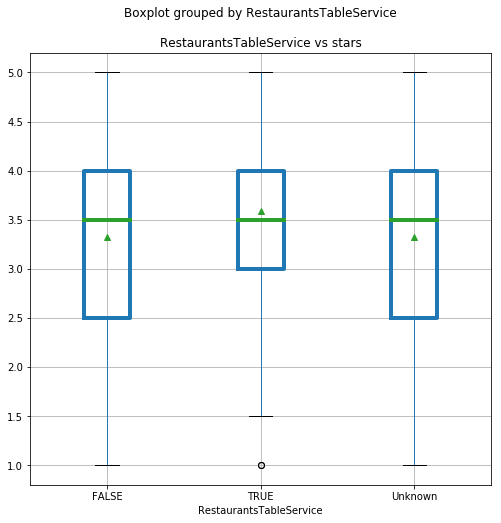

In [72]:
createBoxPlot(lv_restaurant_parsed_data,"stars","RestaurantsTableService")   

If the restaurants have table services, the ratings tend to be no less than 3.0

In [73]:
lv_restaurant_parsed_data["RestaurantsTableService"].value_counts()

TRUE       2807
FALSE      1960
Unknown     915
Name: RestaurantsTableService, dtype: int64

In [74]:
ts_vs_rating = pd.crosstab(lv_restaurant_parsed_data["stars"], lv_restaurant_parsed_data["RestaurantsTableService"])
ts_vs_rating

RestaurantsTableService,FALSE,TRUE,Unknown
stars,,,
1.0,6,2,13
1.5,60,16,49
2.0,171,64,100
2.5,280,203,127
3.0,337,482,132
3.5,428,795,142
4.0,412,853,165
4.5,230,349,106
5.0,36,43,81


Therefore, we should use RestaurantsTableService as our dependent variable.

## 3.2.2 GoodForMeal vs Rating

In [75]:
lv_restaurant_parsed_data["GoodForMeal"].value_counts()

dinner,       1917
Unknown       1858
lunch,         758
brunch,        626
breakfast,     357
latenight,     111
dessert,        55
Name: GoodForMeal, dtype: int64

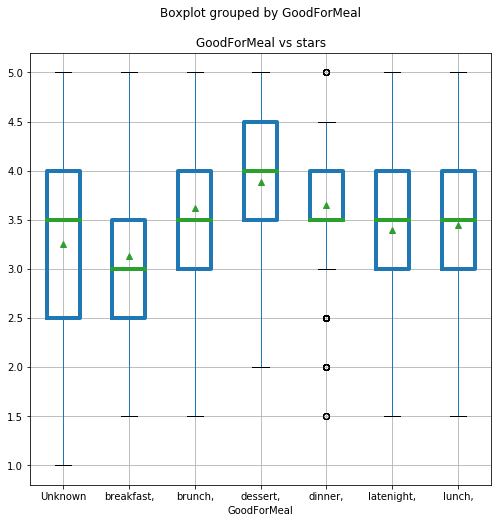

In [77]:
createBoxPlot(lv_restaurant_parsed_data,"stars","GoodForMeal")

In [76]:
gfm_vs_rating = pd.crosstab(lv_restaurant_parsed_data["stars"], lv_restaurant_parsed_data["GoodForMeal"])
gfm_vs_rating

GoodForMeal,Unknown,"breakfast,","brunch,","dessert,","dinner,","latenight,","lunch,"
stars,,,,,,,
1.0,21,0,0,0,0,0,0
1.5,89,14,5,0,5,1,11
2.0,218,32,16,3,25,1,40
2.5,281,59,62,4,105,15,84
3.0,306,84,97,2,289,30,143
3.5,310,92,140,10,584,31,198
4.0,327,60,180,15,640,24,184
4.5,184,15,114,17,260,7,88
5.0,122,1,12,4,9,2,10


Therefore, we should use Good For Meal as our dependent variable.

## 3.2.3 Alcohol vs Rating

In [78]:
lv_restaurant_parsed_data["Alcohol"].value_counts()

none             2443
full_bar         1639
Unknown           843
beer_and_wine     757
Name: Alcohol, dtype: int64

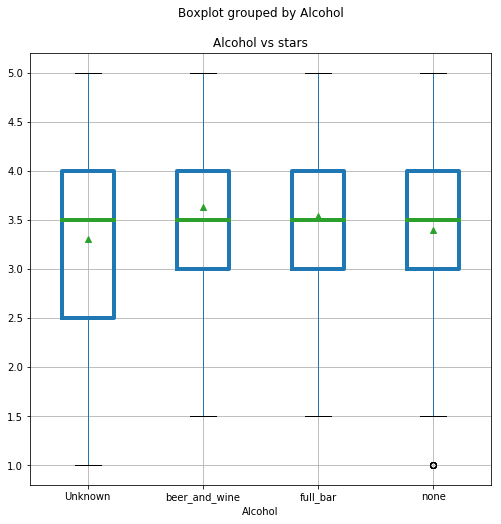

In [79]:
createBoxPlot(lv_restaurant_parsed_data,"stars","Alcohol")

Alcohol didn't play a significant role in influencing the rating

## 3.2.4 Caters vs Rating

In [80]:
lv_restaurant_parsed_data["Caters"].value_counts()

FALSE      2130
TRUE       1959
Unknown    1593
Name: Caters, dtype: int64

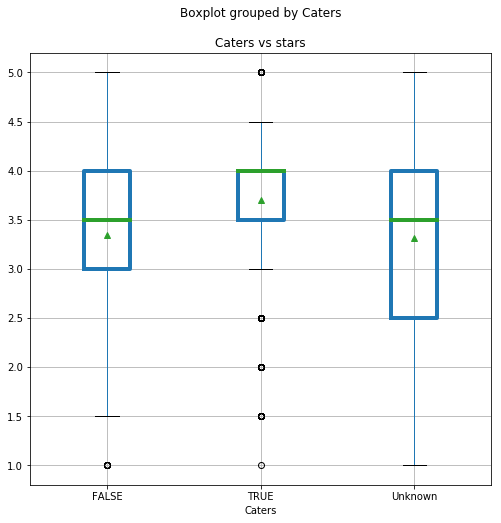

In [81]:
createBoxPlot(lv_restaurant_parsed_data,"stars","Caters")

In [82]:
cs_vs_rating = pd.crosstab(lv_restaurant_parsed_data["stars"], lv_restaurant_parsed_data["Caters"])
cs_vs_rating

Caters,FALSE,TRUE,Unknown
stars,,,
1.0,7,1,13
1.5,42,17,66
2.0,153,42,140
2.5,264,115,231
3.0,406,272,273
3.5,537,504,324
4.0,528,600,302
4.5,178,350,157
5.0,15,58,87


 Since we don't know the correct values of UNKNOWN, I will not use caters as dependent variable 

## 3.2.5 HasTV vs Rating

In [83]:
lv_restaurant_parsed_data["HasTV"].value_counts()

TRUE       2500
FALSE      2341
Unknown     841
Name: HasTV, dtype: int64

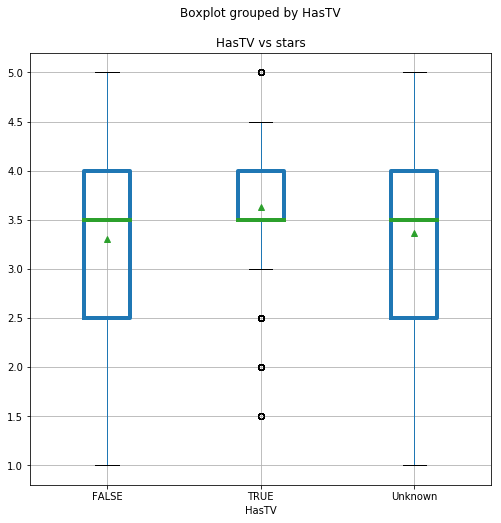

In [84]:
createBoxPlot(lv_restaurant_parsed_data,"stars","HasTV")

TV is influential in determining rating.

## 3.2.6 'RestaurantsGoodForGroups',  vs Rating

In [85]:
lv_restaurant_parsed_data['RestaurantsGoodForGroups'].value_counts()

TRUE       4897
FALSE       393
Unknown     392
Name: RestaurantsGoodForGroups, dtype: int64

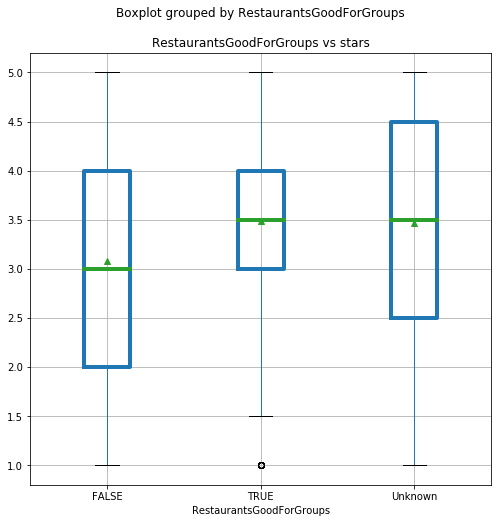

In [86]:
createBoxPlot(lv_restaurant_parsed_data,"stars","RestaurantsGoodForGroups")

## 3.2.7 NoiseLevel  vs Rating

In [87]:
lv_restaurant_parsed_data['NoiseLevel'].value_counts()

average      3167
Unknown      1211
quiet         912
loud          293
very_loud      99
Name: NoiseLevel, dtype: int64

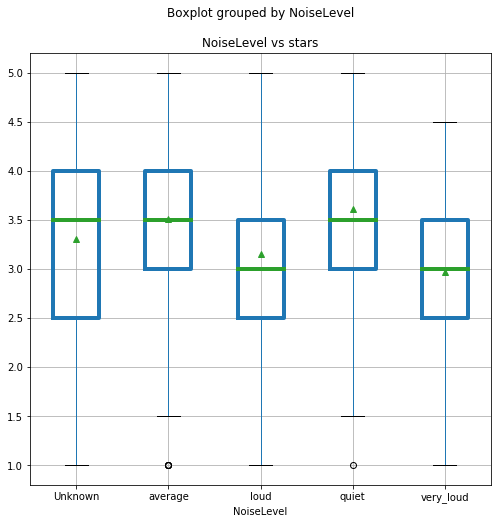

In [88]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'NoiseLevel')

Noise level should be included in the analysis.

## 3.2.8 Wifi vs Rating

In [89]:
lv_restaurant_parsed_data['WiFi'].value_counts()

no         2620
free       1789
Unknown    1218
paid         55
Name: WiFi, dtype: int64

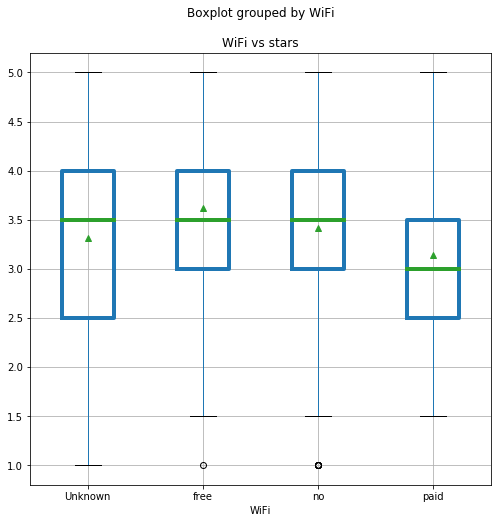

In [90]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'WiFi')

## 3.2.9 RestaurantsAttire vs Rating

In [91]:
lv_restaurant_parsed_data['RestaurantsAttire'].value_counts()

casual     4991
Unknown     491
dressy      195
formal        5
Name: RestaurantsAttire, dtype: int64

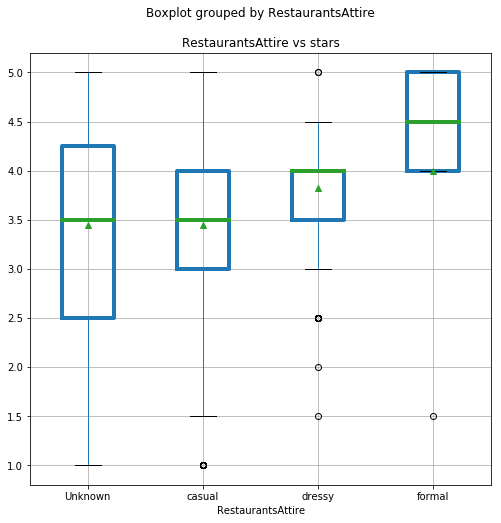

In [92]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'RestaurantsAttire')

## 3.2.10 RestaurantsReservations vs Rating

In [93]:
lv_restaurant_parsed_data['RestaurantsReservations'].value_counts()

FALSE      3491
TRUE       1685
Unknown     506
Name: RestaurantsReservations, dtype: int64

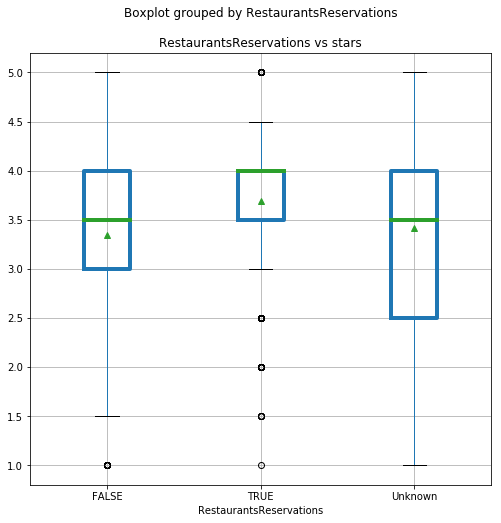

In [94]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'RestaurantsReservations')

## 3.2.11 OutdoorSeating vs Rating

In [95]:
lv_restaurant_parsed_data['OutdoorSeating'].value_counts()

FALSE      3742
TRUE       1408
Unknown     532
Name: OutdoorSeating, dtype: int64

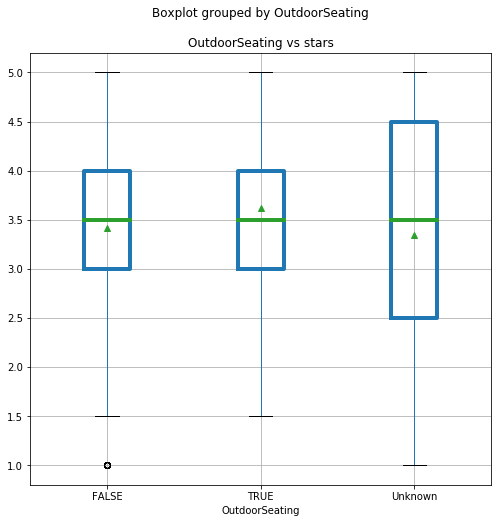

In [96]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'OutdoorSeating')

## 3.2.12 BusinessAcceptsCreditCards vs Rating

In [97]:
lv_restaurant_parsed_data['BusinessAcceptsCreditCards'].value_counts()

TRUE       5424
Unknown     182
FALSE        76
Name: BusinessAcceptsCreditCards, dtype: int64

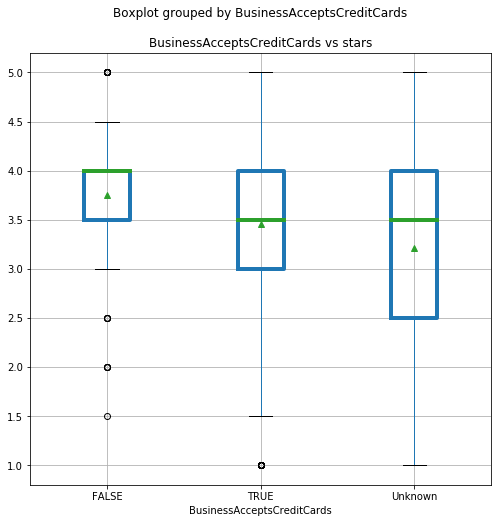

In [98]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'BusinessAcceptsCreditCards')

## 3.2.13 RestaurantsPriceRange2 vs Rating

In [99]:
lv_restaurant_parsed_data['RestaurantsPriceRange2'].value_counts()

2.0        2587
TRUE       2461
3.0         273
Unknown     251
4.0         110
Name: RestaurantsPriceRange2, dtype: int64

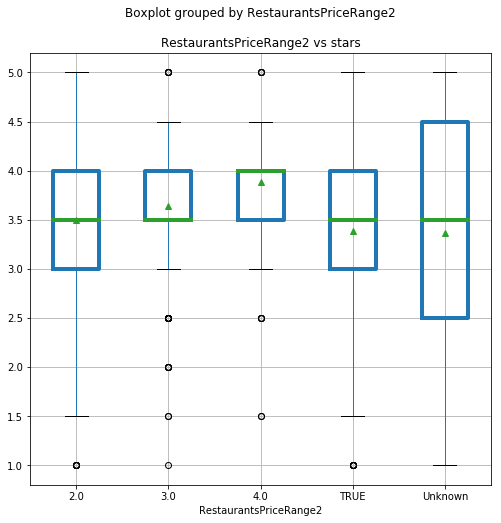

In [100]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'RestaurantsPriceRange2')

## 3.2.14 BikeParking vs Rating

In [101]:
lv_restaurant_parsed_data['BikeParking'].value_counts()

TRUE       2812
Unknown    1435
FALSE      1435
Name: BikeParking, dtype: int64

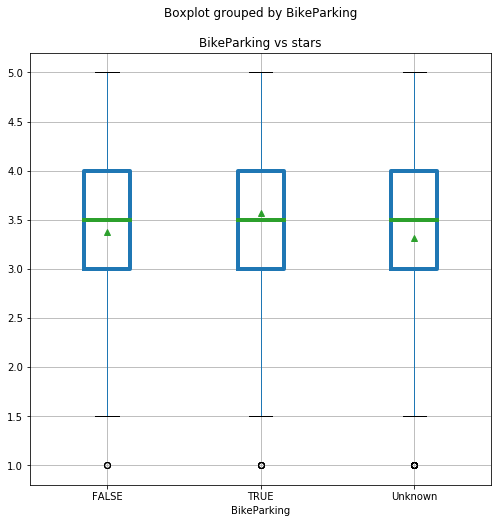

In [102]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'BikeParking')

## 3.2.14 RestaurantsDelivery vs Rating

In [103]:
lv_restaurant_parsed_data['RestaurantsDelivery'].value_counts()

FALSE      4012
TRUE       1118
Unknown     552
Name: RestaurantsDelivery, dtype: int64

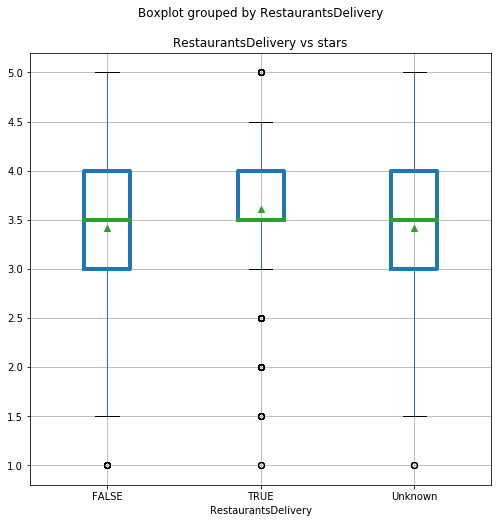

In [104]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'RestaurantsDelivery')

## 3.2.15 Ambience vs Rating

In [105]:
lv_restaurant_parsed_data['Ambience'].value_counts()

casual,      2677
Unknown      2446
divey,        140
trendy,       123
classy,       102
upscale,       80
touristy,      36
hipster,       28
romantic,      26
intimate,      24
Name: Ambience, dtype: int64

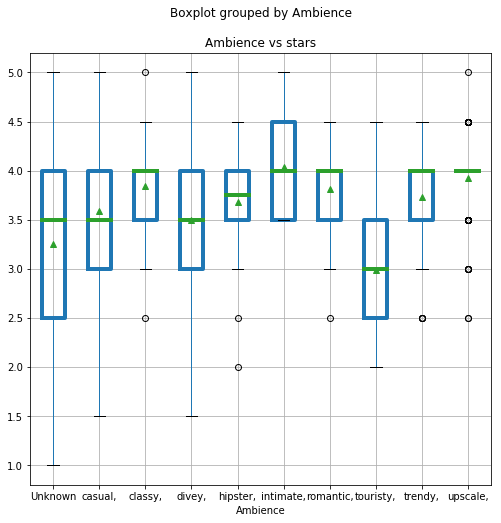

In [106]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'Ambience')

We should take ambience into consideration.

## 3.2.16 RestaurantsTakeOut vs Rating

In [107]:
lv_restaurant_parsed_data['RestaurantsTakeOut'].value_counts()

TRUE       4839
FALSE       436
Unknown     407
Name: RestaurantsTakeOut, dtype: int64

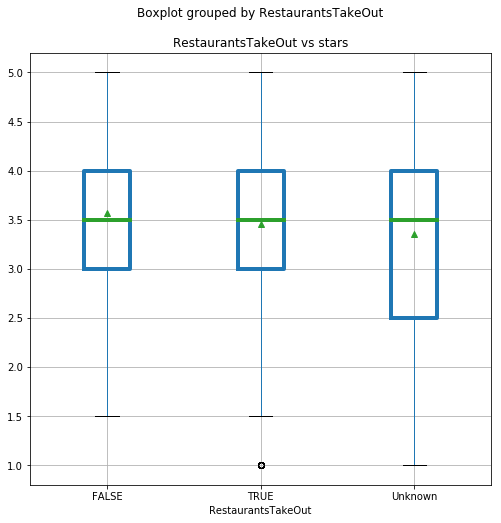

In [108]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'RestaurantsTakeOut')

## 3.2.17 GoodForKids vs Rating

In [109]:
lv_restaurant_parsed_data['GoodForKids'].value_counts()

TRUE       4367
FALSE       883
Unknown     432
Name: GoodForKids, dtype: int64

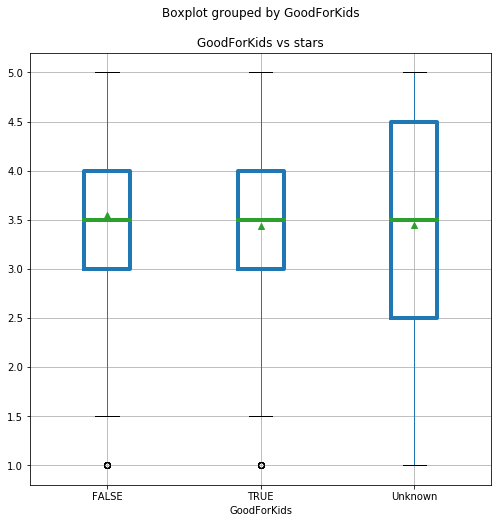

In [110]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'GoodForKids')

## 3.2.18 DriveThru vs Rating

In [111]:
lv_restaurant_parsed_data['DriveThru'].value_counts()

Unknown    4762
FALSE       518
TRUE        402
Name: DriveThru, dtype: int64

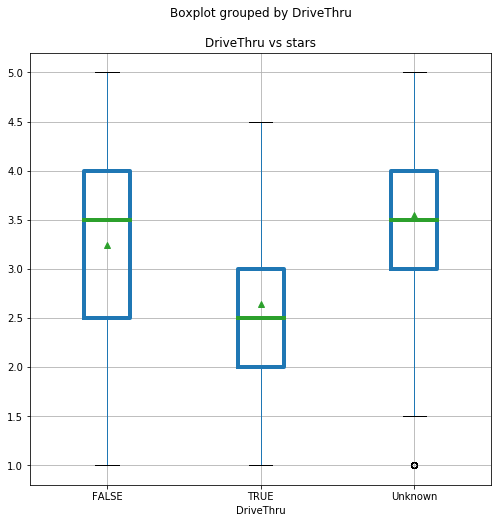

In [112]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'DriveThru')

We should include drive through in the analysis.

## 3.2.19 BusinessParking vs Raing

In [113]:
lv_restaurant_parsed_data['BusinessParking'].value_counts()

lot,          2464
Unknown       2221
garage,        486
valet,         370
street,        131
validated,      10
Name: BusinessParking, dtype: int64

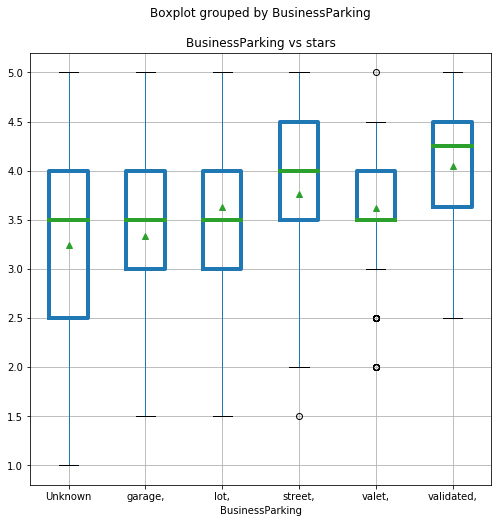

In [114]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'BusinessParking')

## 3.2.20 DogsAllowed vs Ratings

In [115]:
lv_restaurant_parsed_data['DogsAllowed'].value_counts()

Unknown    4948
FALSE       597
TRUE        137
Name: DogsAllowed, dtype: int64

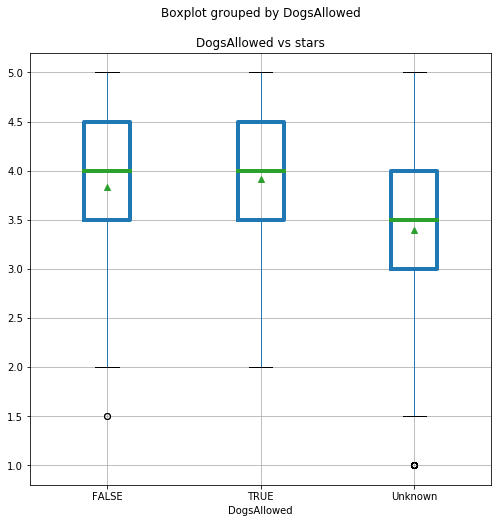

In [116]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'DogsAllowed')

## 3.2.21 WheelchairAccessible vs Rating

In [117]:
lv_restaurant_parsed_data['WheelchairAccessible'].value_counts()

TRUE       2870
Unknown    2660
FALSE       152
Name: WheelchairAccessible, dtype: int64

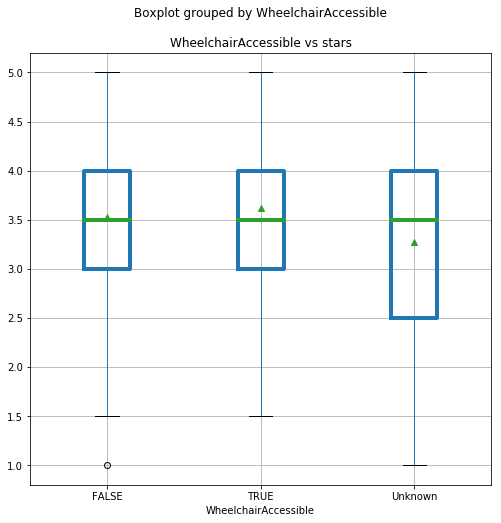

In [118]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'WheelchairAccessible')

## 3.2.22 Music vs Ratings

In [119]:
lv_restaurant_parsed_data['Music'].value_counts()

Unknown              5363
background_music,     114
jukebox,               68
live,                  58
dj,                    52
karaoke,               20
video,                  7
Name: Music, dtype: int64

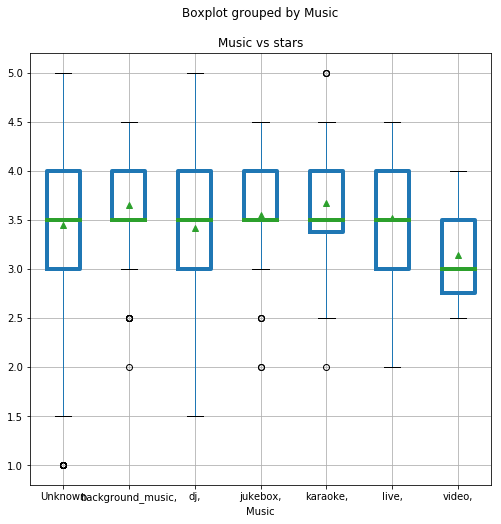

In [120]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'Music')

## 3.2.23 HappyHour vs Rating

In [121]:
lv_restaurant_parsed_data['HappyHour'].value_counts()

Unknown    5048
TRUE        534
FALSE       100
Name: HappyHour, dtype: int64

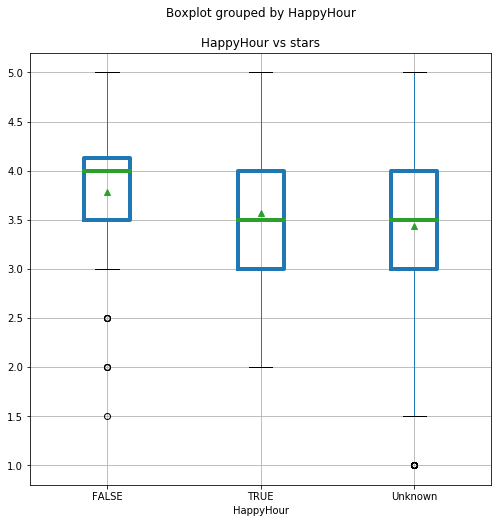

In [122]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'HappyHour')

HappyHour is an important feature in the analysis.

## 3.2.24 GoodForDancing vs Rating

In [123]:
lv_restaurant_parsed_data['GoodForDancing'].value_counts()

Unknown    5053
FALSE       507
TRUE        122
Name: GoodForDancing, dtype: int64

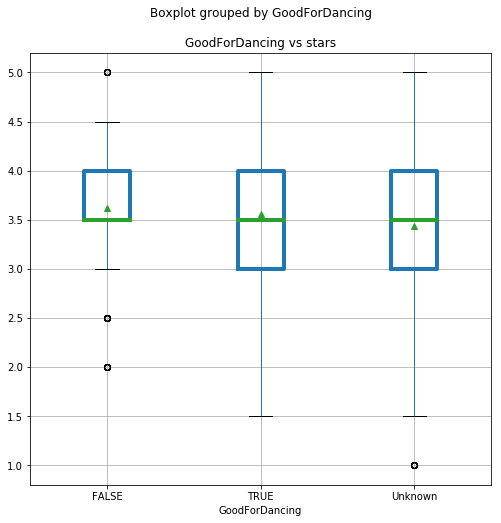

In [124]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'GoodForDancing')

## 3.2.25 BestNights vs Rating

In [125]:
lv_restaurant_parsed_data['BestNights'].value_counts()

Unknown       5183
saturday,      398
thursday,       31
wednesday,      24
sunday,         22
friday,         15
tuesday,         5
monday,          4
Name: BestNights, dtype: int64

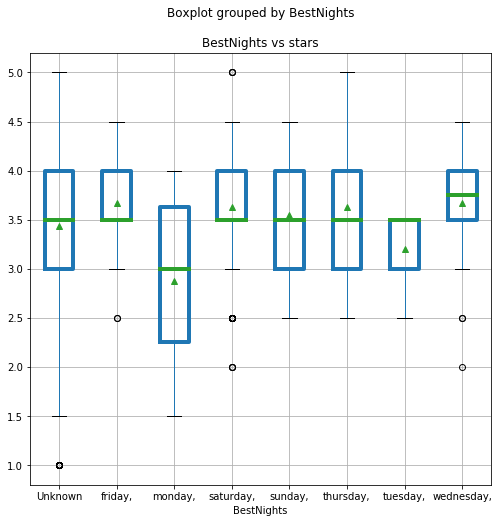

In [126]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'BestNights')

## 3.2.26 CoatCheck vs Rating

In [127]:
lv_restaurant_parsed_data['CoatCheck'].value_counts()

Unknown    5080
FALSE       562
TRUE         40
Name: CoatCheck, dtype: int64

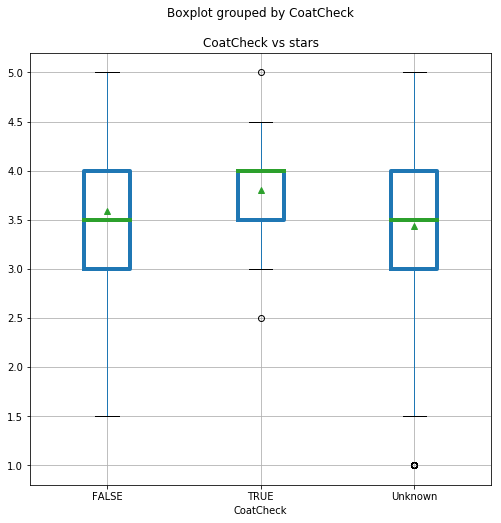

In [128]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'CoatCheck')

We should include coatcheck feature in the analysis

## 3.2.27 ByAppointmentOnly vs Ratings

In [129]:
lv_restaurant_parsed_data['ByAppointmentOnly'].value_counts()

Unknown    5575
FALSE        97
TRUE         10
Name: ByAppointmentOnly, dtype: int64

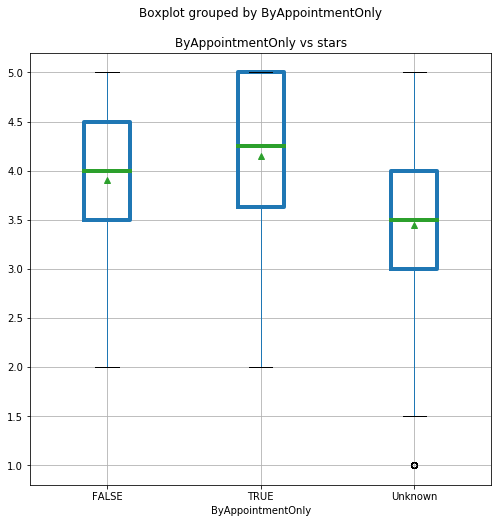

In [130]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'ByAppointmentOnly')

We should include by appointment only feature in the analysis

## 3.2.28 BusinessAcceptsBitcoin

In [131]:
lv_restaurant_parsed_data['BusinessAcceptsBitcoin'].value_counts()

Unknown    5198
FALSE       474
TRUE         10
Name: BusinessAcceptsBitcoin, dtype: int64

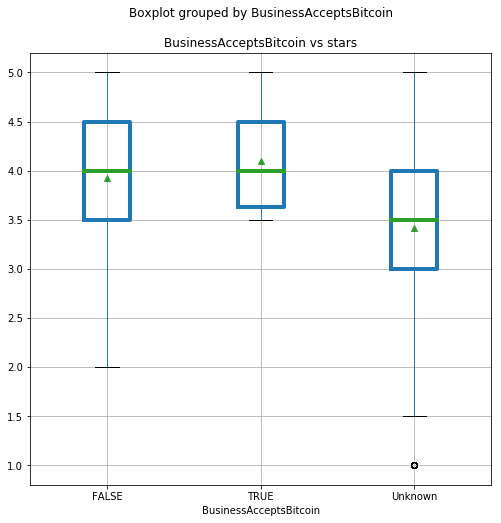

In [132]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'BusinessAcceptsBitcoin')

It is not showing a big difference in rating whether the restaurant accepts bitcoin or not.

## 3.2.29 BYOBCorkage

In [133]:
lv_restaurant_parsed_data['BYOBCorkage'].value_counts()

Unknown        5358
yes_free        136
no              122
yes_corkage      66
Name: BYOBCorkage, dtype: int64

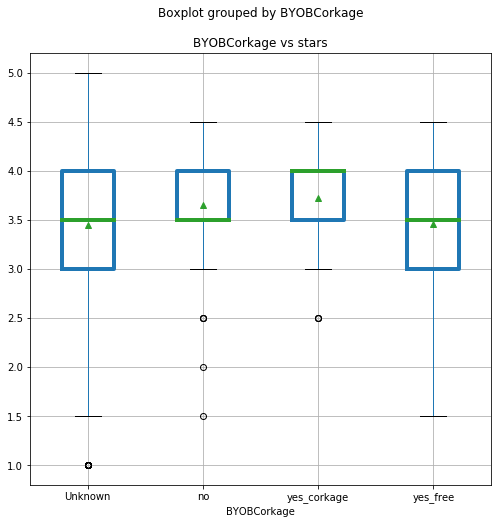

In [134]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'BYOBCorkage')

We should include BYOBCorkage in the analysis.

## 3.2.30 BYOB vs Ratings

In [135]:
lv_restaurant_parsed_data['BYOB'].value_counts()

Unknown    5466
FALSE       203
TRUE         13
Name: BYOB, dtype: int64

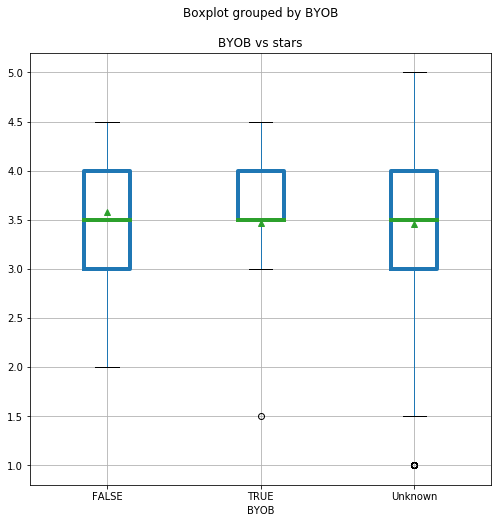

In [136]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'BYOB')

## 3.2.31 Open24Hours vs Rating

In [137]:
lv_restaurant_parsed_data['Open24Hours'].value_counts()

Unknown    5616
FALSE        57
TRUE          9
Name: Open24Hours, dtype: int64

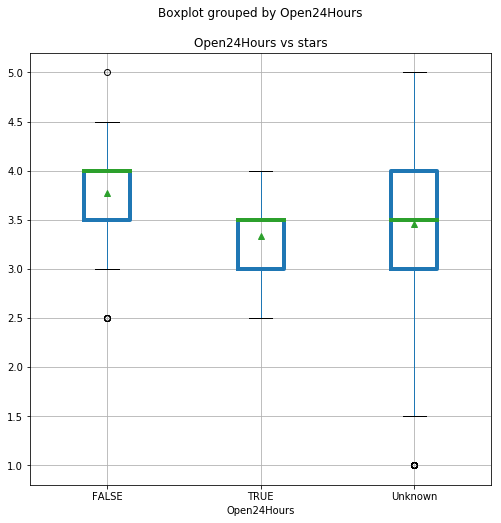

In [138]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'Open24Hours')

## 3.2.32 RestaurantsCounterService vs Ratings

In [139]:
lv_restaurant_parsed_data['RestaurantsCounterService'].value_counts()

Unknown    5591
TRUE         53
FALSE        38
Name: RestaurantsCounterService, dtype: int64

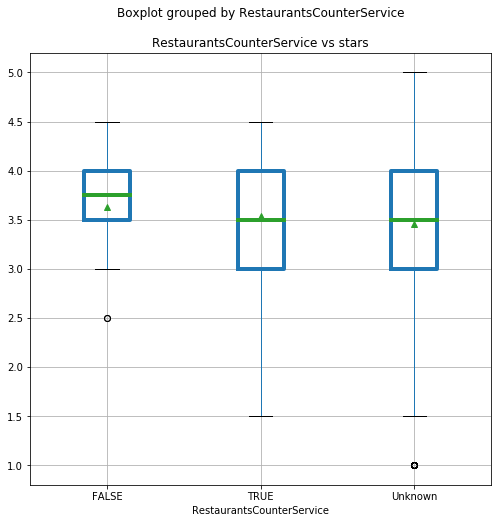

In [140]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'RestaurantsCounterService')

## 3.2.33 Smoking vs Ratings

In [141]:
lv_restaurant_parsed_data['Smoking'].value_counts()

Unknown    5126
no          242
yes         232
outdoor      82
Name: Smoking, dtype: int64

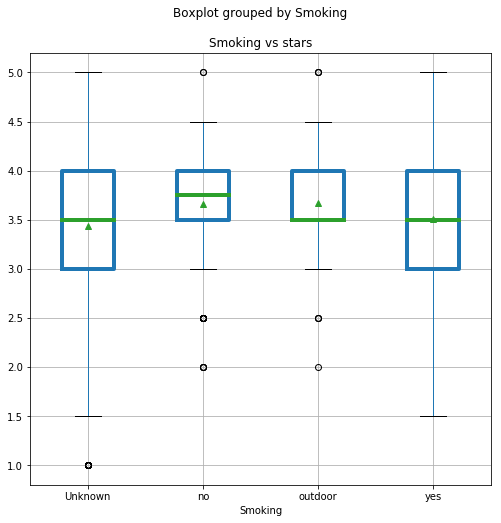

In [142]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'Smoking')

We should include smoking feature in teh analysis.

## 3.2.34 Corkage vs Ratings

In [143]:
lv_restaurant_parsed_data['Corkage'].value_counts()

Unknown    5472
FALSE       140
TRUE         70
Name: Corkage, dtype: int64

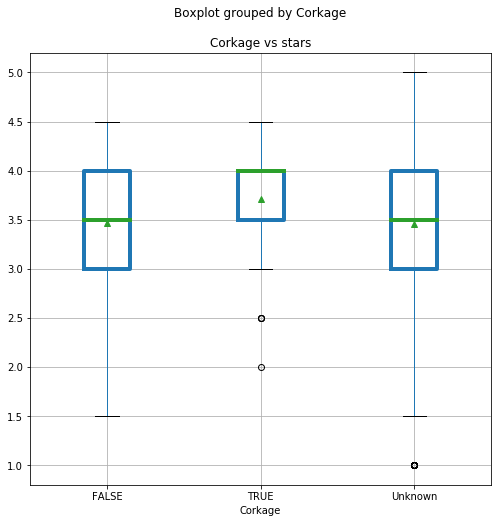

In [144]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'Corkage')

We should include corkage in the analysis(this might be  a duplicate of BYOB Corkage).

## 3.2.35 AgesAllowed vs Ratings

In [145]:
lv_restaurant_parsed_data['AgesAllowed'].value_counts()

Unknown    5667
21plus       14
allages       1
Name: AgesAllowed, dtype: int64

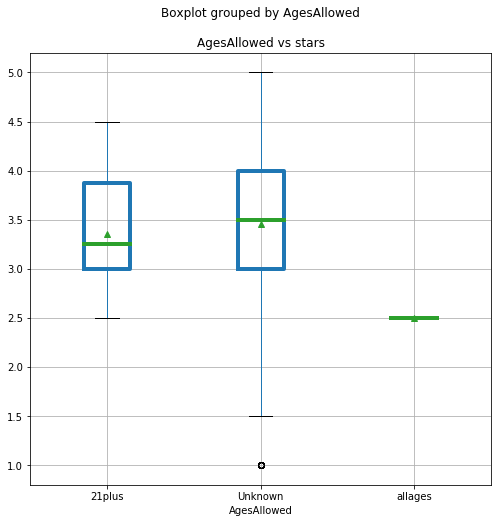

In [146]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'AgesAllowed')

## 3.2.36 DietaryRestrictions vs Ratings

In [147]:
lv_restaurant_parsed_data['DietaryRestrictions'].value_counts()

Unknown        5672
vegetarian,       9
vegan,            1
Name: DietaryRestrictions, dtype: int64

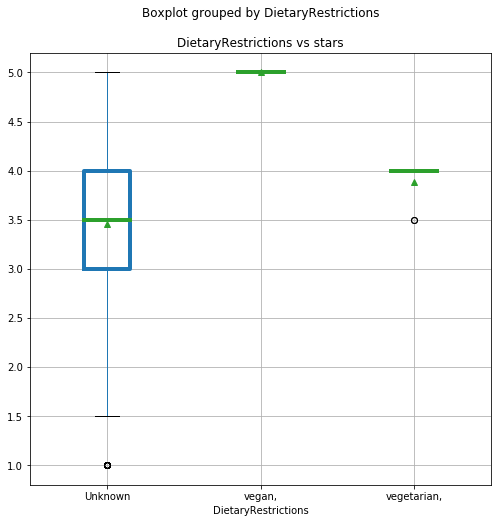

In [148]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'DietaryRestrictions')

Sample size too small, cannot make inference.

## 3.2.37  Conclusion:

Based on above analysis, I will include these following features as dependent variable:

1.Restaurants Table Service(3 classes: True,False,Unknown)
2.Good For Meal(7 classes: Breakfast,Brunch,Dessert,Dinner,Latenight,Lunch,Unknown)
3.Caters(3 classes: True, False, Unknown)
4.Has TV(3 classes: True, False, Unknown)
5.Restaurants Good For Groups(3 classes: True, False, Unknown)
6.Noise Level(5 classes: Average,Loud,Quite,Very_Loud, Unknown)
7.WiFi(4 classes: Free, No, Paid, Unknown)
8.Restaurants Attire(4 classes: Casual, Dressy, Formal, Unknown)
9.Restaurants Reservations(3 classes: True, False, Unknown)
10.Business Accepts Credit Cards(3 classes: True, False, Unknown)
11.Restaurants Delivery(3 classes: True, False, Unknown)
12.Ambience(10 classes:Casual,Divey,Trendy,Classy,Upscale,Touristy,Hipster,Romantic,Intimate and Unknown)         
13.Drive through(3 classes: True, False, Unknown)
14.Business Parking(6 classes: Garage,Lot,Street,Valet,Validated, Unknown)

## 3.2.38 Create dataframe to use in the future

In [151]:
businessFinalData=lv_restaurant_parsed_data[['business_id','stars','RestaurantsTableService','GoodForMeal','Caters','HasTV','RestaurantsGoodForGroups','NoiseLevel',
                                   'WiFi','RestaurantsAttire','RestaurantsReservations','BusinessAcceptsCreditCards','RestaurantsDelivery',
                                   'Ambience','DriveThru','BusinessParking']]

In [152]:
businessFinalData.shape

(5682, 16)

In [153]:
finalData=businessFinalData.set_index('business_id')

In [154]:
finalData.head()

,stars,RestaurantsTableService,GoodForMeal,Caters,HasTV,RestaurantsGoodForGroups,NoiseLevel,WiFi,RestaurantsAttire,RestaurantsReservations,BusinessAcceptsCreditCards,RestaurantsDelivery,Ambience,DriveThru,BusinessParking
business_id,,,,,,,,,,,,,,,
LDMCrFlGIFUN6L-FEFgzWg,3.0,TRUE,Unknown,TRUE,FALSE,TRUE,average,no,casual,FALSE,TRUE,FALSE,Unknown,TRUE,Unknown
QTH_XGh4rWYdd0fTW-tUDw,3.5,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,casual,FALSE,Unknown,Unknown,Unknown,Unknown,Unknown
DiA78qPtp6rfRNdomzjBbw,3.5,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,TRUE,Unknown,Unknown,Unknown,"lot,"
YTqtM2WFhcMZGeAGA08Cfg,4.5,TRUE,"brunch,",TRUE,TRUE,TRUE,average,no,casual,TRUE,TRUE,FALSE,"casual,",Unknown,"lot,"
Oto60yDwk1z72WmfWEYrjg,3.0,TRUE,"dinner,",FALSE,FALSE,TRUE,average,no,casual,TRUE,TRUE,FALSE,"casual,",Unknown,"garage,"


## 3.3 Let's craete the dummy variables of the categories

In [155]:
cuisines=lv_restaurants_data['categories'].str.get_dummies(sep=',')

In [156]:
cuisines.head()

,Acai Bowls,Active Life,Acupuncture,Adult Entertainment,Afghan,African,Air Duct Cleaning,Aircraft Repairs,Airport Shuttles,Airports,Airsoft,American (New),American (Traditional),Amusement Parks,Antiques,Appliances,Appliances & Repair,Aquarium Services,Aquariums,Arabian,Arcades,Argentine,Armenian,Art Classes,Art Galleries,Arts & Entertainment,Asian Fusion,Auto Customization,Auto Glass Services,Auto Insurance,Auto Parts & Supplies,Auto Repair,Automotive,Baby Gear & Furniture,Bagels,Bakeries,Bangladeshi,Bar Crawl,Barbeque,Bars,Bartenders,Basque,Beauty & Spas,Bed & Breakfast,Beer,Beer Bar,Beer Garden,Beer Gardens,Belgian,Beverage Store,Bingo Halls,Bistros,Books,Bowling,Brasseries,Brazilian,Breakfast & Brunch,Breweries,British,Bubble Tea,Buffets,Bulgarian,Burgers,Butcher,Cabaret,Cafes,Cafeteria,Cajun/Creole,Candy Stores,Cantonese,Car Dealers,Car Rental,Car Wash,Caribbean,Casinos,Caterers,Cheese Shops,Cheesesteaks,Chicken Shop,Chicken Wings,Chinese,Chocolatiers & Shops,Cinema,Cocktail Bars,Coffee & Tea,Coffee Roasteries,Coffeeshops,Colleges & Universities,Colombian,Comfort Food,Convenience Stores,Cosmetics & Beauty Supply,Country Dance Halls,Creperies,Cuban,Cultural Center,Cupcakes,Custom Cakes,DJs,Dance Clubs,Day Spas,Delicatessen,Delis,Department Stores,Desserts,Dim Sum,Diners,Dinner Theater,Discount Store,Dive Bars,Do-It-Yourself Food,Doctors,Donuts,Drive-Thru Bars,Drugstores,Dry Cleaning,Education,Electronics,Ethic Grocery,Ethiopian,Ethnic Food,Ethnic Grocery,Event Planning & Services,Eyebrow Services,Falafel,Family Practice,Farmers Market,Fashion,Fast Food,Feng Shui,Festivals,Filipino,Financial Services,Fish & Chips,Fitness & Instruction,Flowers & Gifts,Fondue,Food,Food Court,Food Delivery Services,Food Stands,Food Tours,Food Trucks,French,Fruits & Veggies,Fur Clothing,Furniture Repair,Furniture Stores,Gas Stations,Gastropubs,Gay Bars,Gelato,German,Gift Shops,Gluten-Free,Golf,Greek,Grocery,Guamanian,Gun/Rifle Ranges,Gyms,Hair Salons,Halal,Hawaiian,Health & Medical,Health Markets,Heating & Air Conditioning/HVAC,Himalayan/Nepalese,Hobby Shops,Home & Garden,Home Cleaning,Home Decor,Home Services,Honduran,Hong Kong Style Cafe,Hookah Bars,Hostels,Hot Dogs,Hot Pot,Hotels,Hotels & Travel,Hungarian,Ice Cream & Frozen Yogurt,Imported Food,Indian,Insurance,Interior Design,International Grocery,Internet Cafes,Irish,Irish Pub,Italian,Izakaya,Japanese,Japanese Curry,Jazz & Blues,Juice Bars & Smoothies,Karaoke,Kebab,Kids Activities,Kitchen & Bath,Korean,Kosher,Landmarks & Historical Buildings,Laotian,Latin American,Laundry Services,Lebanese,Limos,Live/Raw Food,Local Fish Stores,Local Flavor,Local Services,Lounges,Macarons,Mags,Makeup Artists,Malaysian,Martial Arts,Massage,Massage Therapy,Meat Shops,Medical Centers,Meditation Centers,Mediterranean,Men's Clothing,Mexican,Middle Eastern,Modern European,Mongolian,Moroccan,Mortgage Brokers,Music & Video,Music Venues,Musicians,Nail Salons,New Mexican Cuisine,Newspapers & Magazines,Nicaraguan,Nightlife,Noodles,Nutritionists,Occupational Therapy,Oil Change Stations,Organic Stores,Outlet Stores,Paint & Sip,Pakistani,Pan Asian,Party & Event Planning,Party Bus Rentals,Party Supplies,Pasta Shops,Patisserie/Cake Shop,Performing Arts,Permanent Makeup,Persian/Iranian,Personal Assistants,Personal Chefs,Personal Shopping,Peruvian,Pet Services,Pet Stores,Pets,Physical Therapy,Piano Bars,Pilates,Pizza,Playgrounds,Plumbing,Poke,Polish,Pool Halls,Portuguese,Poutineries,Pretzels,Printing Services,Professional Services,Pub Food,Public Services & Government,Pubs,Puerto Rican,RV Parks,Ramen,Real Estate,Reflexology,Rehabilitation Center,Resorts,Restaurant Supplies,Restaurants,Russian,Salad,Salvadoran,Sandwiches,Scandinavian,Screen Printing,Seafood,Seafood Markets,Security Services,Septic Services,Shanghainese,Shaved Ice,Shopping,Shopping Centers,Signmaking,Singaporean,Ski Resorts,Smokehouse,Soba,Social Clubs,Soul Food,Soup,South African,Southern,Spanish,Special Education,Specialty Food,Sports Bars,Steakhouses,Street 

In [157]:
cuisines.shape

(5682, 367)

In [158]:
cuisines.sum().sort_values(ascending=False)

Restaurants               5682
Food                      1117
Fast Food                  847
Nightlife                  764
American (Traditional)     739
Mexican                    724
Bars                       720
Sandwiches                 621
Pizza                      587
American (New)             555
Burgers                    505
Chinese                    410
Breakfast & Brunch         390
Italian                    370
Japanese                   325
                          ... 
Discount Store               1
Screen Printing              1
Dry Cleaning                 1
Electronics                  1
Restaurant Supplies          1
Rehabilitation Center        1
Eyebrow Services             1
Family Practice              1
Reflexology                  1
Real Estate                  1
RV Parks                     1
Feng Shui                    1
Financial Services           1
Printing Services            1
Yoga                         1
Length: 367, dtype: int64

In [159]:
cuisines=cuisines.drop(["Restaurants","Food"],axis=1)

In [160]:
cuisines.sum().sort_values(ascending=False)

Fast Food                 847
Nightlife                 764
American (Traditional)    739
Mexican                   724
Bars                      720
Sandwiches                621
Pizza                     587
American (New)            555
Burgers                   505
Chinese                   410
Breakfast & Brunch        390
Italian                   370
Japanese                  325
Seafood                   308
Asian Fusion              247
                         ... 
Discount Store              1
Screen Printing             1
Dry Cleaning                1
Electronics                 1
Restaurant Supplies         1
Rehabilitation Center       1
Eyebrow Services            1
Family Practice             1
Reflexology                 1
Real Estate                 1
RV Parks                    1
Feng Shui                   1
Financial Services          1
Food Tours                  1
Yoga                        1
Length: 365, dtype: int64

In [161]:
top20=cuisines.sum().nlargest(n=20)

### What are the top 20 cuisines?

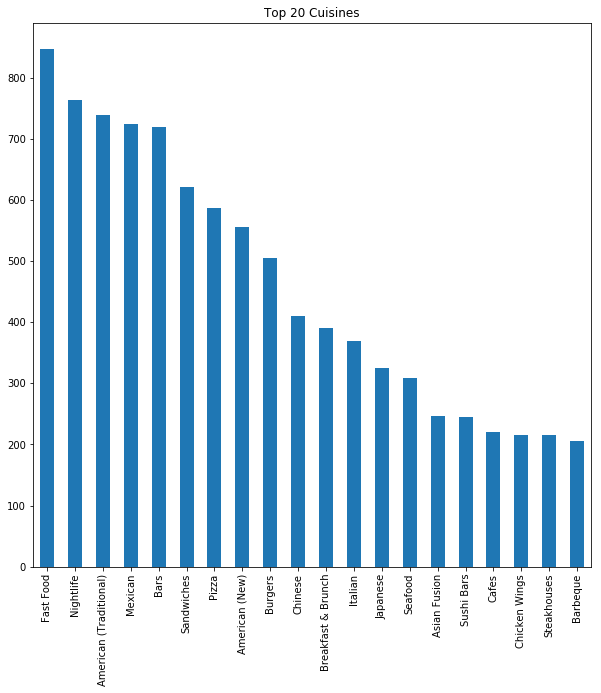

In [162]:
top20.plot(kind="bar",figsize=(10,10),title="Top 20 Cuisines")

Too many cuisine types so we will not include them in the analysis.

## 3.4 Let's look at the neighbourhoods

In [163]:
lv_restaurant_parsed_data['neighborhood'].value_counts()

The Strip          853
Unknown            809
Southeast          664
Westside           627
Eastside           480
Spring Valley      445
Downtown           354
Chinatown          308
Southwest          257
Northwest          202
Sunrise            181
Centennial         179
Summerlin          134
University          88
South Summerlin     66
The Lakes           27
Anthem               8
Name: neighborhood, dtype: int64

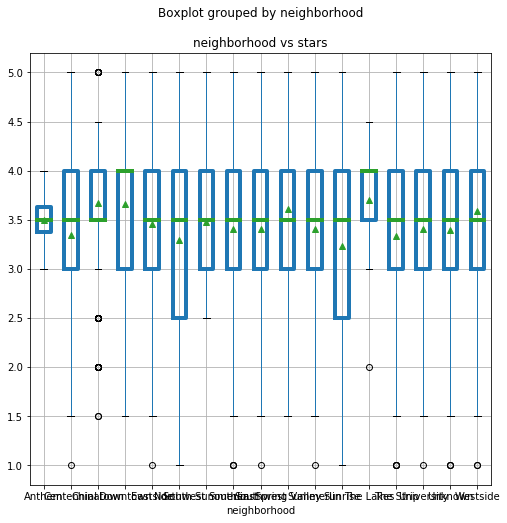

In [164]:
createBoxPlot(lv_restaurant_parsed_data,"stars",'neighborhood')

The neighbourhoods is not important in temrs of restaurant ratings.

In [165]:
neighbours=lv_restaurants_data['neighborhood'].str.get_dummies(sep=',')

In [166]:
top20=neighbours.sum().nlargest(n=20)

## Where are most of these resaurants located in?

In [167]:
top20

The Strip          853
Southeast          664
Westside           627
Eastside           480
Spring Valley      445
Downtown           354
Chinatown          308
Southwest          257
Northwest          202
Sunrise            181
Centennial         179
Summerlin          134
University          88
South Summerlin     66
The Lakes           27
Anthem               8
dtype: int64

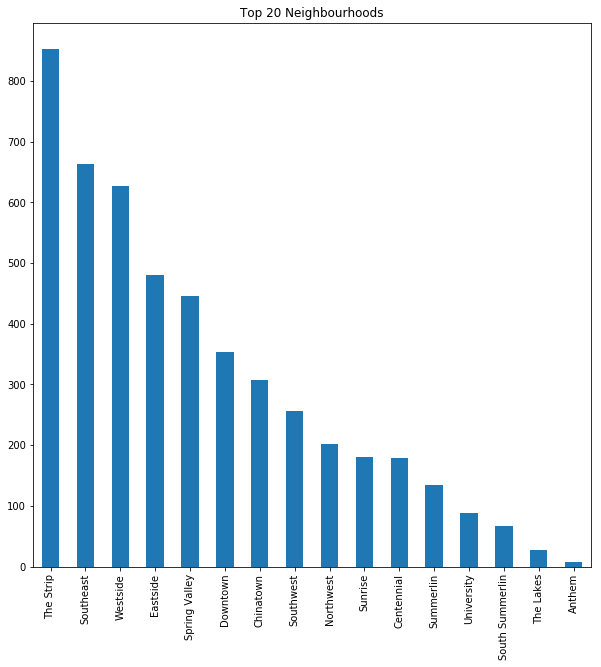

In [168]:
top20.plot(kind="bar",figsize=(10,10),title="Top 20 Neighbourhoods")

## 3.5 Let's take a look at the zip code

In [169]:
lv_restaurant_parsed_data['postal_code'].value_counts()

89109    859
89119    430
89102    328
89103    318
89146    282
89101    241
89123    240
89121    205
89147    205
89117    203
89104    189
89169    157
89118    140
89130    137
89139    129
        ... 
89138      2
89044      2
93013      1
89114      1
89039      1
89105      1
89173      1
89133      1
89165      1
89081      1
89161      1
89150      1
89199      1
89179      1
89619      1
Name: postal_code, Length: 70, dtype: int64

In [170]:
top20=lv_restaurant_parsed_data['postal_code'].value_counts().nlargest(n=20)

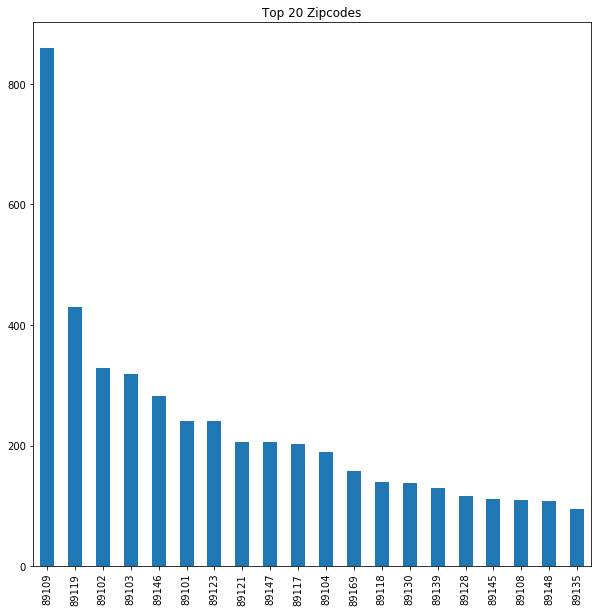

In [171]:
top20.plot(kind="bar",figsize=(10,10),title="Top 20 Zipcodes")

Since postal code is correlated with the location, we will not include postal code in the analysis.

## 3.6 Let's look at the review count

In [172]:
lv_restaurant_parsed_data['review_count'].describe()

count    5682.000000
mean      149.582541
std       341.862067
min         3.000000
25%        14.000000
50%        44.000000
75%       148.000000
max      6979.000000
Name: review_count, dtype: float64

In [173]:
lv_restaurant_parsed_data['review_count'].sum()

849928

(0, 7000)

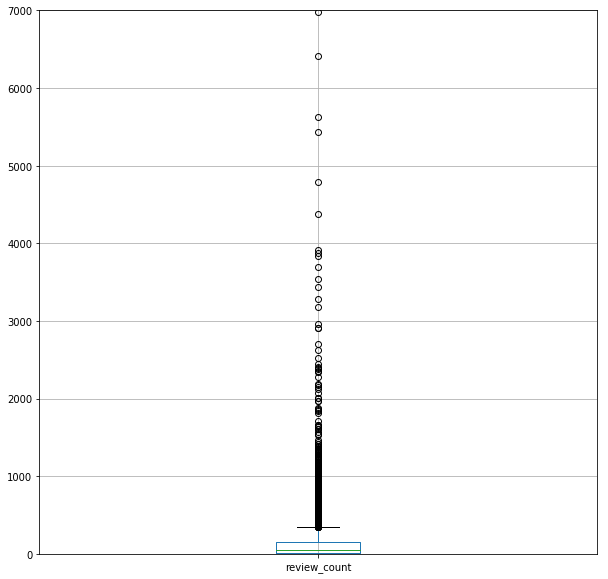

In [174]:
lv_restaurants_data.boxplot(column='review_count',figsize=(10,10),grid=True).set_ylim(0,7000,500)

In [175]:
lv_restaurants_data['review_count'].value_counts()

3       222
4       171
5       171
6       138
7       126
9       124
8       101
14       97
11       95
10       91
12       90
13       83
18       77
17       76
16       69
       ... 
1665      1
1869      1
358       1
5429      1
2005      1
1547      1
2071      1
2123      1
2151      1
2279      1
266       1
6417      1
290       1
298       1
3838      1
Name: review_count, Length: 768, dtype: int64

(0, 1000)

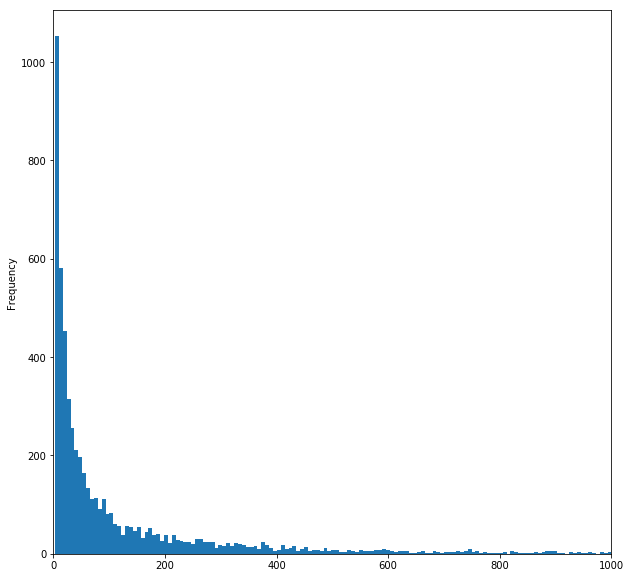

In [176]:
lv_restaurants_data['review_count'].plot.hist(bins=1000, figsize=(10, 10)).set_xlim((0,1000))

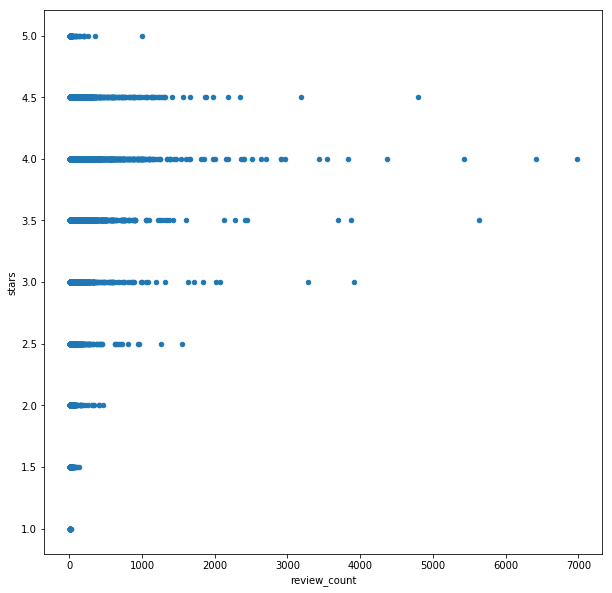

In [177]:
lv_restaurants_data.plot(kind='scatter', x='review_count', y='stars',figsize=(10,10))

In [178]:
bins=[0,14,44,148,350,6979]
labels=["less known","not popular","known","popular","very popular"]

In [179]:
lv_restaurants_data['rc_bin'] = pd.cut(lv_restaurants_data['review_count'], bins, labels=labels)

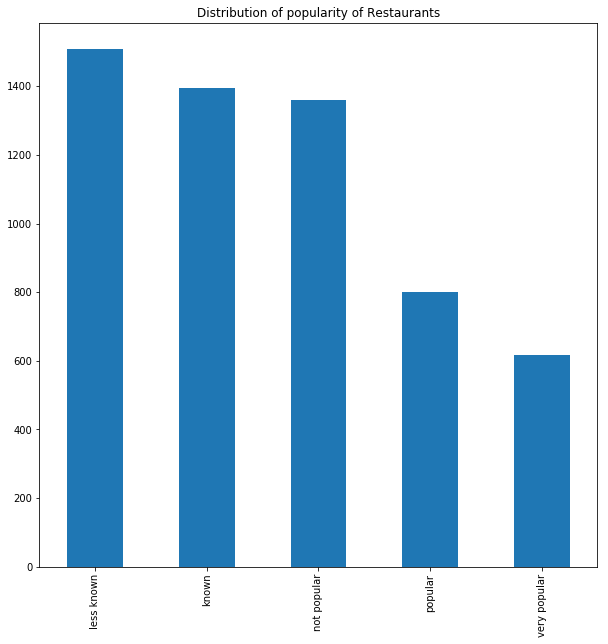

In [180]:
lv_restaurants_data['rc_bin'].value_counts().plot(kind="bar",figsize=(10,10),title="Distribution of popularity of Restaurants")

In [181]:
lv_restaurants_data['rc_bin'].value_counts()

less known      1509
known           1394
not popular     1361
popular          800
very popular     618
Name: rc_bin, dtype: int64

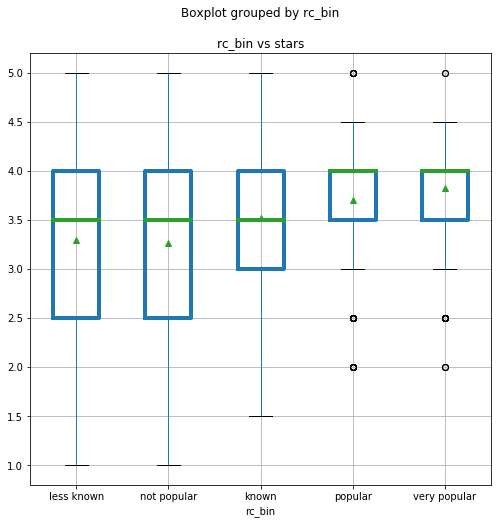

In [182]:
createBoxPlot(lv_restaurants_data,"stars",'rc_bin')

Therefore, I will include the rc_bin in my analysis.

In [183]:
finalData['rc_bin']=lv_restaurants_data['rc_bin']

In [184]:
finalData.shape

(5682, 16)

## 3.6 Finally, let's look at the ratings/stars

In [185]:
lv_restaurants_data['stars'].describe()

count    5682.000000
mean        3.455913
std         0.798719
min         1.000000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: stars, dtype: float64

The rating is skewed to the left since the mean is smaller than the median

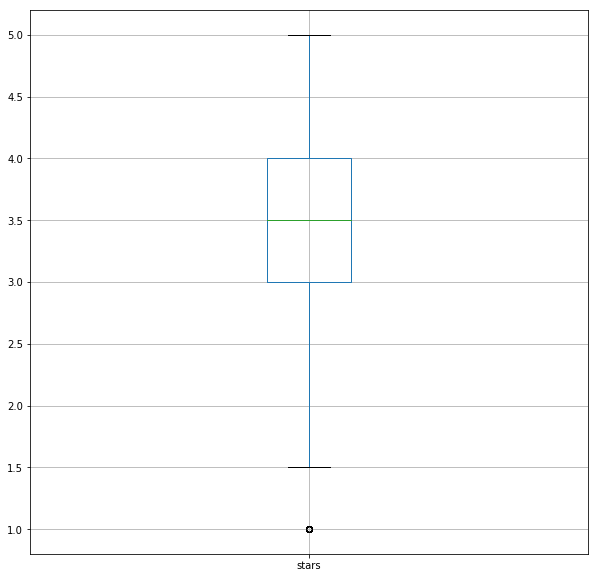

In [186]:
lv_restaurants_data.boxplot(column='stars',figsize=(10,10),grid=True)

In [187]:
lv_restaurants_data['stars'].value_counts()

4.0    1430
3.5    1365
3.0     951
4.5     685
2.5     610
2.0     335
5.0     160
1.5     125
1.0      21
Name: stars, dtype: int64

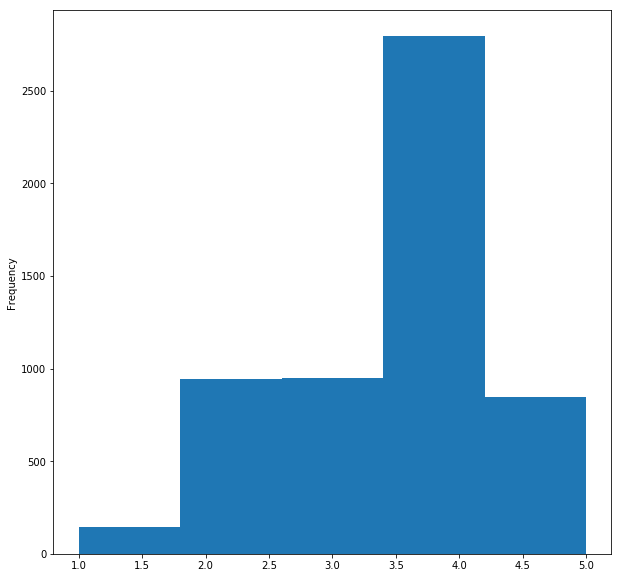

In [188]:
lv_restaurants_data['stars'].plot.hist(bins=5, figsize=(10, 10))

## 4. Model

## 4.1 KNN

###  4.1.1 Preprocess the Data

In [189]:
knn_data=pd.get_dummies(finalData)

In [190]:
knn_data.shape

(5682, 66)

In [191]:
knn_data.head()

,stars,RestaurantsTableService_FALSE,RestaurantsTableService_TRUE,RestaurantsTableService_Unknown,GoodForMeal_Unknown,"GoodForMeal_breakfast,","GoodForMeal_brunch,","GoodForMeal_dessert,","GoodForMeal_dinner,","GoodForMeal_latenight,","GoodForMeal_lunch,",Caters_FALSE,Caters_TRUE,Caters_Unknown,HasTV_FALSE,HasTV_TRUE,HasTV_Unknown,RestaurantsGoodForGroups_FALSE,RestaurantsGoodForGroups_TRUE,RestaurantsGoodForGroups_Unknown,NoiseLevel_Unknown,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,WiFi_Unknown,WiFi_free,WiFi_no,WiFi_paid,RestaurantsAttire_Unknown,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,RestaurantsReservations_FALSE,RestaurantsReservations_TRUE,RestaurantsReservations_Unknown,BusinessAcceptsCreditCards_FALSE,BusinessAcceptsCreditCards_TRUE,BusinessAcceptsCreditCards_Unknown,RestaurantsDelivery_FALSE,RestaurantsDelivery_TRUE,RestaurantsDelivery_Unknown,Ambience_Unknown,"Ambience_casual,","Ambience_classy,","Ambience_divey,","Ambience_hipster,","Ambience_intimate,","Ambience_romantic,","Ambience_touristy,","Ambience_trendy,","Ambience_upscale,",DriveThru_FALSE,DriveThru_TRUE,DriveThru_Unknown,BusinessParking_Unknown,"BusinessParking_garage,","BusinessParking_lot,","BusinessParking_street,","BusinessParking_valet,","BusinessParking_validated,",rc_bin_less known,rc_bin_not popular,rc_bin_known,rc_bin_popular,rc_bin_very popular
business_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LDMCrFlGIFUN6L-FEFgzWg,3.0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
QTH_XGh4rWYdd0fTW-tUDw,3.5,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
DiA78qPtp6rfRNdomzjBbw,3.5,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
YTqtM2WFhcMZGeAGA08Cfg,4.5,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
Oto60yDwk1z72WmfWEYrjg,3.0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [192]:
knn_X=knn_data.drop('stars',axis=1)

In [193]:
knn_Y=knn_data['stars']
knn_Y=knn_Y.astype('str')

In [194]:
X_train, X_test, Y_train, Y_test = train_test_split(knn_X, knn_Y, test_size=0.2, random_state=33)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4545, 65)
(4545,)
(1137, 65)
(1137,)


### 4.1.2 Fit the Model

In [196]:
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [197]:
knnpreds_test = knnclf.predict(X_test)

### 4.1.3 Evalute the Model

### 4.1.3.1 Get Confusion Matrix

In [198]:
knncm = confusion_matrix(Y_test, knnpreds_test)
print(knncm)

[[ 0  0  0  1  2  0  0  1  0]
 [ 0  4  7  6  2  1  1  4  1]
 [ 3  5 10 15 12 16  6  4  1]
 [ 1  4 16 28 19 25 27  6  3]
 [ 0  3 21 31 41 50 37 12  3]
 [ 1  5  9 30 41 85 65 23  6]
 [ 0  6 15 24 32 86 91 19  5]
 [ 1  1  6  3 22 34 49 21  2]
 [ 0  1  2  0  6  4  5  7  1]]


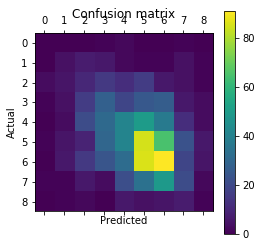

In [199]:
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 4.1.3.2 Compare Accuracy Scores

In [209]:
knn_test_acc=knnclf.score(X_test, Y_test)
knn_train_acc=knnclf.score(X_train, Y_train)
print("The accuracy score of KNN Method in train set is {:6f}".format(knn_train_acc))
print("The accuracy score of KNN Method in test set is {:6f}".format(knn_test_acc))

The accuracy score of KNN Method in train set is 0.715292
The accuracy score of KNN Method in test set is 0.247142


The problem is overfitting!

### 4.1.4 Perform Feature Selection

In [210]:
def getTopFeatures(clf,X,Y,k):
    percentiles = list(range(1, 100, 5))
    results = []
    for i in range(1, 100, 5):
        fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
        X_train = X[:4546]
        Y_train= Y[:4546]
        X_train_fs = fs.fit_transform(X_train, Y_train)
        X_fs=fs.transform(X)
        scores = cross_validation.cross_val_score(clf, X_fs, Y, cv=k)
        print(i,scores.mean())
        results = np.append(results, scores.mean())
    optimal_percentile = np.where(results == results.max())[0][0]
    print("Optimal percentile of features:{}".format(percentiles[optimal_percentile]))
    optimal_num_features = int(list(percentiles)[optimal_percentile]*len(X_train.columns)/100)
    print("Optimal number of features:{}".format(optimal_num_features))

    plt.figure()
    plt.xlabel("Percentage of features selected")
    plt.ylabel("Cross validation accuracy")
    plt.plot(percentiles,results)

In [211]:
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')

1 0.250258979183
6 0.233189868561
11 0.239889601228
16 0.244810515112
21 0.242346964034
26 0.230907943266
31 0.23953130028
36 0.237953600337
41 0.254839538107
46 0.253431087403
51 0.258182442635
56 0.256771516622
61 0.252375677616
66 0.251145139731
71 0.256776157826
76 0.257481311419
81 0.257127032847
86 0.255193507265
91 0.254840156935
96 0.253960803485
Optimal percentile of features:51
Optimal number of features:33


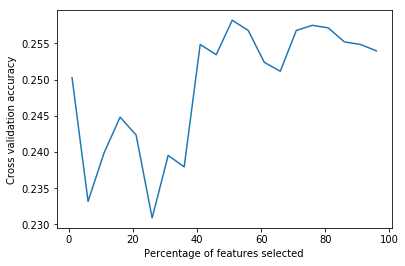

In [212]:
getTopFeatures(knnclf,knn_X,knn_Y,5)

Therefore, we should get top 51% features

In [213]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=51)

In [214]:
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
X_train_fs = fs.fit_transform(X_train, Y_train)
knnclf.fit(X_train_fs, Y_train)
X_test_fs=fs.transform(X_test)

In [216]:
knn_test_acc=knnclf.score(X_test_fs, Y_test)
knn_train_acc=knnclf.score(X_train_fs, Y_train)
print("The accuracy score of KNN Method in train set is {:6f}".format(knn_train_acc))
print("The accuracy score of KNN Method in test set is {:6f}".format(knn_test_acc))

The accuracy score of KNN Method in train set is 0.663146
The accuracy score of KNN Method in test set is 0.240106


Compare the accuracy score.

The problem of overfitting is still there.

"Talk about bias and variance trade off"

## 4.1.5 Gridsearch

In [217]:
knnclf = neighbors.KNeighborsClassifier()

In [219]:
parameters = {
    'n_neighbors': np.arange(10)+1,
    'weights': ['uniform','distance'],
}

In [221]:
gs = GridSearchCV(knnclf, parameters, verbose=1, cv=5)

In [222]:
%time _ = gs.fit(X_train, Y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 29.8 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.7s finished


({'n_neighbors': 10, 'weights': 'uniform'}, 0.2671067106710671)

In [223]:
knnclf = neighbors.KNeighborsClassifier(10, weights='uniform')
X_train_fs = fs.fit_transform(X_train, Y_train)
knnclf.fit(X_train_fs, Y_train)
X_test_fs=fs.transform(X_test)

In [224]:
knn_test_acc=knnclf.score(X_test_fs, Y_test)
knn_train_acc=knnclf.score(X_train_fs, Y_train)
print("The accuracy score of KNN Method in train set is {:6f}".format(knn_train_acc))
print("The accuracy score of KNN Method in test set is {:6f}".format(knn_test_acc))

The accuracy score of KNN Method in train set is 0.400440
The accuracy score of KNN Method in test set is 0.276165


## 4.2 Decision Tree

### 4.2.1 Preprocess the data

In [400]:
dt_X=knn_X
dt_Y=knn_Y

In [401]:
X_train, X_test, Y_train, Y_test = train_test_split(dt_X, dt_Y, test_size=0.2, random_state=33)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4545, 65)
(4545,)
(1137, 65)
(1137,)


### 4.2.2 Fit the Model

In [402]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [403]:
treeclf = treeclf.fit(X_train, Y_train)

### 4.2.3 Evaluate the Model

In [404]:
treepreds_test = treeclf.predict(X_test)

In [405]:
dt_test_acc=treeclf.score(X_test, Y_test)
dt_train_acc=treeclf.score(X_train, Y_train)
print("The accuracy score of Decision Tree in train set is {:6f}".format(dt_train_acc))
print("The accuracy score of Decision Tree in test set is {:6f}".format(dt_test_acc))

The accuracy score of Decision Tree in train set is 0.680088
The accuracy score of Decision Tree in test set is 0.246262


Less overfitting than the KNN model

In [243]:
treecm = confusion_matrix(Y_test, treepreds_test)
print(treecm)

[[ 0  0  0  1  2  1  0  0  0]
 [ 0  4  6  8  4  2  1  0  1]
 [ 4  9 14 16 11  8  6  3  1]
 [ 0  4 18 27 26 22 24  4  4]
 [ 2  8 20 26 54 38 40  8  2]
 [ 1  2 10 34 48 75 70 23  2]
 [ 0  4 16 30 42 82 85 16  3]
 [ 0  2  9 13 24 29 38 23  1]
 [ 0  0  0  2  8  4  3  6  3]]


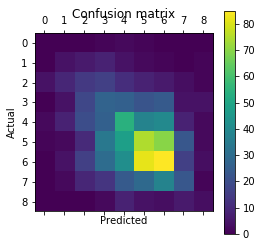

In [244]:
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 4.2.4 Perform Feature Selection

In [406]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

1 0.265575880591
6 0.274900059407
11 0.269622391643
16 0.269624866952
21 0.27824853338
26 0.273319265328
31 0.274726787792
36 0.260298522241
41 0.253788150697
46 0.251324599619
51 0.25096877398
56 0.245863140177
61 0.239005297161
66 0.244111240377
71 0.248509554692
76 0.246924119409
81 0.242350986411
86 0.243580596054
91 0.246924119409
96 0.246395640981
Optimal percentile of features:21
Optimal number of features:13


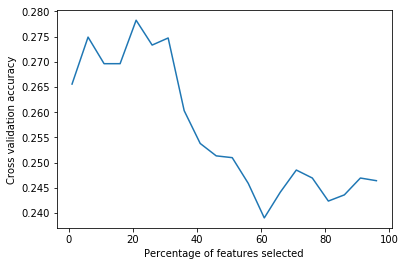

In [407]:
getTopFeatures(treeclf,dt_X,dt_Y,5)

Therefore, we should use top 21% features

In [410]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=21)

In [411]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
X_train_fs = fs.fit_transform(X_train, Y_train)
treeclf.fit(X_train_fs, Y_train)
X_test_fs=fs.transform(X_test)

array(['RestaurantsTableService_TRUE', 'RestaurantsTableService_Unknown',
       'GoodForMeal_Unknown', 'GoodForMeal_dinner,', 'Caters_TRUE',
       'HasTV_Unknown', 'RestaurantsGoodForGroups_Unknown',
       'NoiseLevel_Unknown', 'WiFi_Unknown', 'RestaurantsAttire_Unknown',
       'Ambience_Unknown', 'DriveThru_TRUE', 'BusinessParking_Unknown',
       'BusinessParking_lot,'], dtype=object)

In [251]:
dt_test_acc=treeclf.score(X_test_fs, Y_test)
dt_train_acc=treeclf.score(X_train_fs, Y_train)
print("The accuracy score of Decision Tree in train set is {:6f}".format(dt_train_acc))
print("The accuracy score of Decision Tree in test set is {:6f}".format(dt_test_acc))

The accuracy score of Decision Tree in train set is 0.372277
The accuracy score of Decision Tree in test set is 0.260334


In [485]:
treepreds_test.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

The problem of overfitting got resolved. However, the model is not complex enough the fit the data.

In [415]:
dt_X.columns[fs.get_support()].values

array(['RestaurantsTableService_TRUE', 'RestaurantsTableService_Unknown',
       'GoodForMeal_Unknown', 'GoodForMeal_dinner,', 'Caters_TRUE',
       'HasTV_Unknown', 'RestaurantsGoodForGroups_Unknown',
       'NoiseLevel_Unknown', 'WiFi_Unknown', 'RestaurantsAttire_Unknown',
       'Ambience_Unknown', 'DriveThru_TRUE', 'BusinessParking_Unknown',
       'BusinessParking_lot,'], dtype=object)

In [451]:
for i in range(len(dt_X.columns.values)):
    if fs.get_support()[i]:
        print("{:35} {:20}".format(dt_X.columns.values[i],fs.scores_[i]))

RestaurantsTableService_TRUE           161.7231128687851
RestaurantsTableService_Unknown        232.0059301600887
GoodForMeal_Unknown                     331.059030265652
GoodForMeal_dinner,                     227.406020389406
Caters_TRUE                           161.90251059581226
HasTV_Unknown                         169.15306593270094
RestaurantsGoodForGroups_Unknown      184.17903708845438
NoiseLevel_Unknown                     239.9966829824095
WiFi_Unknown                          169.41467630548863
RestaurantsAttire_Unknown             211.33626339556739
Ambience_Unknown                      297.03316500009373
DriveThru_TRUE                         405.8077269705346
BusinessParking_Unknown                311.4898304873481
BusinessParking_lot,                  167.05291946426232


### 4.2.5 GridSearch

In [256]:
treeclf = tree.DecisionTreeClassifier()


In [277]:
parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': np.linspace(1, 20, 10),
    'min_samples_leaf': list(range(1,30,2)),
    'min_samples_split': list(range(2,20,2))
}

In [278]:
gs = GridSearchCV(treeclf, parameters, verbose=1, cv=5)

In [279]:
%time _ = gs.fit(X_train, Y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits
Wall time: 4min 36s


[Parallel(n_jobs=1)]: Done 13500 out of 13500 | elapsed:  4.6min finished


({'criterion': 'entropy',
  'max_depth': 7.3333333333333339,
  'min_samples_leaf': 1,
  'min_samples_split': 12},
 0.2842684268426843)

In [280]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=12,min_samples_leaf=1,max_depth=7.3)

In [281]:
X_train_fs = fs.fit_transform(X_train, Y_train)
treeclf.fit(X_train_fs, Y_train)
X_test_fs=fs.transform(X_test)

In [282]:
dt_test_acc=treeclf.score(X_test_fs, Y_test)
dt_train_acc=treeclf.score(X_train_fs, Y_train)
print("The accuracy score of Decision Tree in train set is {:6f}".format(dt_train_acc))
print("The accuracy score of Decision Tree in test set is {:6f}".format(dt_test_acc))

The accuracy score of Decision Tree in train set is 0.318152
The accuracy score of Decision Tree in test set is 0.270888


In [529]:
export_graphviz(treeclf,out_file='tree.dot', feature_names=dt_X.columns[fs.get_support()].values, class_names=["1.0","1.5",
                                                                                                              "2.0","2.5",
                                                                                                               "3.0","3.5",
                                                                                                               "4.0","4.5",
                                                                                                              "5.0"],filled=True)

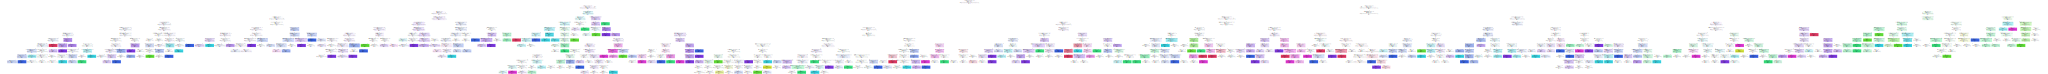

In [530]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [535]:
file=open('tree.png','w')

In [536]:
type(f)

_io.TextIOWrapper

## 4.3 Bayesian Classification

### 4.3.1 Preprocess the data

In [308]:
nbc_X=knn_X
nbc_Y=knn_Y

In [309]:
X_train, X_test, Y_train, Y_test = train_test_split(nbc_X, nbc_Y, test_size=0.2, random_state=33)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4545, 65)
(4545,)
(1137, 65)
(1137,)


### 4.3.2 Fit The Model

In [311]:
nbclf = naive_bayes.GaussianNB()

In [312]:
nbclf = nbclf.fit(X_train, Y_train)

### 4.3.3 Evalute the Model

In [313]:
print(nbclf.score(X_test, Y_test))

0.03781882146


In [314]:
print(nbclf.score(X_train, Y_train))

0.0569856985699


The result is not as good as the KNN or Decision Tree(reasearch on this)

## 4.4 Linear Discriminant Analysis

### 4.4.1 Preprocess the data

In [283]:
ld_X=knn_X
ld_Y=knn_Y

In [284]:
X_train, X_test, Y_train, Y_test = train_test_split(ld_X, ld_Y, test_size=0.2, random_state=33)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4545, 65)
(4545,)
(1137, 65)
(1137,)


### 4.4.2 Fit the Model

In [285]:
ldclf = LinearDiscriminantAnalysis()

In [287]:
ldclf = ldclf.fit(X_train, Y_train)

### 4.4.3 Evaluate the Model

In [291]:
ld_test_acc=ldclf.score(X_test, Y_test)
ld_train_acc=ldclf.score(X_train, Y_train)
print("The accuracy score of LDA in train set is {:6f}".format(ld_train_acc))
print("The accuracy score of LDA in test set is {:6f}".format(ld_test_acc))

The accuracy score of LDA in train set is 0.313751
The accuracy score of LDA in test set is 0.275286


### 4.4.4 Perform Feature Selection

In [292]:
ldclf = LinearDiscriminantAnalysis()

1 0.257834971163
6 0.255368325949
11 0.248329475977
16 0.262757432115
21 0.267515903859
26 0.270506076883
31 0.273322359464
36 0.272266640263
41 0.269979454937
46 0.273322668878
51 0.279311369093
56 0.276847199188
61 0.277547402163
66 0.280186700166
71 0.279305180821
76 0.280537265774
81 0.279304871408
86 0.276490754722
91 0.278250699275
96 0.278250699275
Optimal percentile of features:76
Optimal number of features:49


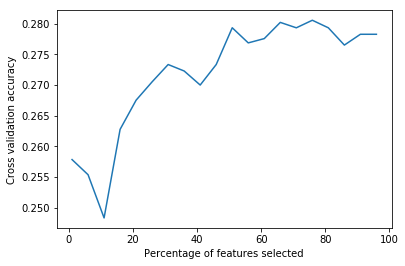

In [293]:
getTopFeatures(ldclf,ld_X,ld_Y,5)

Therefore, we should use top 76% features

In [362]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=76)

In [363]:
ldclf = LinearDiscriminantAnalysis()
X_train_fs = fs.fit_transform(X_train, Y_train)
ldclf.fit(X_train_fs, Y_train)
X_test_fs=fs.transform(X_test)

In [364]:
ld_test_acc=ldclf.score(X_test_fs, Y_test)
ld_train_acc=ldclf.score(X_train_fs, Y_train)
print("The accuracy score of LDA in train set is {:6f}".format(ld_train_acc))
print("The accuracy score of LDA in test set is {:6f}".format(ld_test_acc))

The accuracy score of LDA in train set is 0.311551
The accuracy score of LDA in test set is 0.286719


The result is better than KNN and Decision Tree(research on it)

### 4.4.6 GridSearch

In [323]:
ldclf = LinearDiscriminantAnalysis()

In [358]:
parameters = {
    'solver': ['svd','lsqr']
}

In [359]:
gs = GridSearchCV(ldclf, parameters, verbose=1, cv=5)

In [360]:
%time _ = gs.fit(X_train, Y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 576 ms


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


({'solver': 'svd'}, 0.28074807480748076)

## 4.7 Random Forest

### 4.7.1 Preprocess the data

In [378]:
rf_X=knn_X
rf_Y=knn_Y

In [379]:
X_train, X_test, Y_train, Y_test = train_test_split(rf_X, rf_Y, test_size=0.2, random_state=33)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4545, 65)
(4545,)
(1137, 65)
(1137,)


### 4.7.2 Fit the Model

In [380]:
rfclf = RandomForestClassifier()

In [381]:
rfclf = rf.fit(X_train, Y_train)


### 4.7.3 Evaluate the Model

In [382]:
rf_test_acc=rfclf.score(X_test, Y_test)
rf_train_acc=rfclf.score(X_train, Y_train)
print("The accuracy score of Random Forest in train set is {:6f}".format(rf_train_acc))
print("The accuracy score of Random Forest in test set is {:6f}".format(rf_test_acc))

The accuracy score of Random Forest in train set is 0.718592
The accuracy score of Random Forest in test set is 0.270888


### 4.7.4 Feature Selection

In [383]:
rfclf = RandomForestClassifier()

1 0.265575880591
6 0.275252172083
11 0.269267803659
16 0.266985878363
21 0.281066363029
26 0.27842304265
31 0.270682752048
36 0.268393091413
41 0.257659533652
46 0.263647924454
51 0.265755649892
56 0.265232431496
61 0.26223266665
66 0.270336827644
71 0.262762382732
76 0.266812916161
81 0.265936966262
86 0.258717418748
91 0.26699330429
96 0.267870801257
Optimal percentile of features:21
Optimal number of features:13


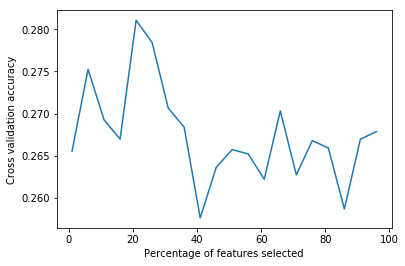

In [384]:
getTopFeatures(rfclf,rf_X,rf_Y,5)

In [395]:
rfclf = LinearDiscriminantAnalysis()
X_train_fs = fs.fit_transform(X_train, Y_train)
rfclf.fit(X_train_fs, Y_train)
X_test_fs=fs.transform(X_test)

## 4.7.5 GridSearch

In [386]:
rfclf = RandomForestClassifier()

In [389]:
parameters = {
    'n_estimators': list(range(5,10,1)),
    'criterion': ['entropy','gini'],
    'max_depth': list(range(5,10,1)),
    'min_samples_split': list(range(5,15,1)),
     'min_samples_leaf': list(range(1,3,1)),
}

In [390]:
gs = GridSearchCV(rfclf, parameters, verbose=1, cv=5)

In [391]:
%time _ = gs.fit(X_train, Y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Wall time: 2min 21s


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  2.4min finished


({'criterion': 'entropy',
  'max_depth': 9,
  'min_samples_leaf': 1,
  'min_samples_split': 14,
  'n_estimators': 7},
 0.30077007700770075)

In [396]:
rfclf = RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_leaf=1,min_samples_split=14,n_estimators=7)

In [398]:
X_train_fs = fs.fit_transform(X_train, Y_train)
rfclf.fit(X_train_fs, Y_train)
X_test_fs=fs.transform(X_test)

In [399]:
rf_test_acc=rfclf.score(X_test_fs, Y_test)
rf_train_acc=rfclf.score(X_train_fs, Y_train)
print("The accuracy score of Random Forest in train set is {:6f}".format(rf_train_acc))
print("The accuracy score of Random Forest in test set is {:6f}".format(rf_test_acc))

The accuracy score of Random Forest in train set is 0.405941
The accuracy score of Random Forest in test set is 0.264732
